## 영화 관객수 예측
### 0. 컬럼 설명
- 독립변수
    - KOBIS(개봉일람, 2015-2019, 6개월 단위 TOP100위)
        - title : 영화 제목
        - director : 감독 이름
        - distributor(obj) : 배급사
        - distributor_group(obj) : 배급사 카테고리화(매출액 기준)
            - A : 씨제이이엔엠, 메가박스중앙, CGV 아트하우스, 롯데, 쇼박스, 넥스트엔터테인먼트(NEW) 외 관련 합작사
            - B : 월트디즈니, 이십세기폭스, 유니버설픽쳐스, 워너브러더스 코리아, 씨네그루, 이수C&E, 티캐스트, 소니픽쳐스, 스톰픽쳐코리아, 키위컴퍼니, 에이원엔터테이먼트, 셀트리온엔터테인먼트, 케이티하이텔_1건, 관련 합작사
            - C : 아이코닉스, CBS, 홈초이스, 애니플러스, 마운틴픽쳐스, 그 외 소규모 영화사
            
        - releas_season(obj) : 영화가 개봉한 날의 계절
        - nation(obj, 5개) : 
             - 미국, 한국, 영국, 일본, 프랑스, 기타
             - 24개 국적에서 개수 10개 이하 국가를 기타로 통합 
        - screen(int) : 영화가 걸렸던 스크린 개수
        - genre(obj, 14개) : 
            - 액션, 드라마, 사극, 코미디, 애니메이션, 스릴러, 멜로/로멘스, 범죄, 어드벤처, 다큐멘터리, 미스터리, SF, 공포, 판타지
            - 기존 19개 장르에서 개수 10개 미만 소수 장르 통합
        - rate(obj) : 영화등급
            - 전체관람가
            - 12세 이상
            - 15세 이상
            - 청소년 관람불가
        - director_power(float) : 해당 영화의 개봉년 기준 3년 내 연출한 영화들의 관람객(2012-2019) 총 합(동명이인 체크)
        - actor_power(int) : 해당 영화의 개봉년 기준 3년 내 주연 출연한 영화들의 관람객(2012-2019) 총 합(동명이인 체크)
    ------------------------------------------------------------------------------------------------------------------------------------
    - 크롤링(네이버 뉴스, 영화 사이트)으로 얻은 자료
        - audience_rating(float) : 네이버 영화 사이트 관람객 평점(개봉 1주일 내)
        - rating_audiences(int) : 네이버 영화 사이트에서 평점을 매긴 관람객 수(개봉 1주일 내)

        - actor_power(int) : 개봉년 기준 3년 내 주연 출연한 영화들의 관람객 총 합
        - news(int) : 개봉 1주일 전후 해당 영화 관련 기사
    - 리서치로 얻은 자료
        - sequel(boolean) : 시리즈물 여부(boolean(binomiel))
        - original(boolean) : 원작(책, 소설, 영상물) 존재, 실화 여부 
        

- 종속변수
    - aud_nationwide : 전국관객수(한국에서의 영화흥행기준)

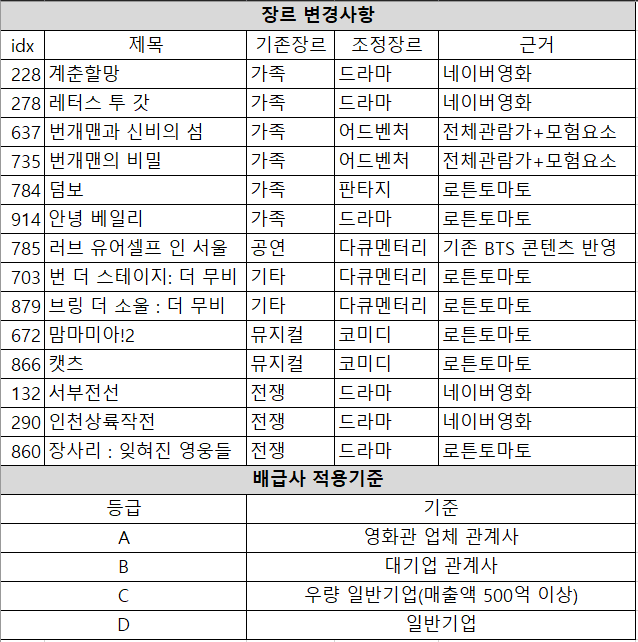

In [29]:
from IPython.display import Image
Image("distributor_criteria.PNG")

### 1. 데이터 불러오기

In [1]:
df_final_03 = pd.read_csv("../final_df_03_ols.csv")
df_final_03 = df_final_03.drop("Unnamed: 0", axis=1)

In [2]:
X_train = pd.read_csv("../X_train_09.csv")
y_train = pd.read_csv("../y_train_09.csv")
X_test = pd.read_csv("../X_test_09.csv")
y_test = pd.read_csv("../y_test_09.csv")

In [3]:
df_train_09 = pd.concat([X_train, y_train], axis=1)
df_test_09 = pd.concat([X_test, y_test], axis=1) 

df_final_09 = pd.concat([df_train_09, df_test_09], axis=0)
df_final_09 = df_final_09.drop("Unnamed: 0", axis=1)
len(df_final_09)

925

In [4]:
df_data_09 = pd.read_csv("data_09.csv")
df_data_09 = df_data_09.drop("Unnamed: 0", axis=1)
#df_data_09.tail()

In [307]:
group_a = ['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
'롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
'씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
'롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
'씨제이이앤엠(주),(주)덱스터스튜디오', '(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스',
'(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트']
group_b = ['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
'워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
'씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
'(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
'(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
'(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)']

In [308]:
df_data_09['distributor_group'] = df_data_09['distributor']
df_data_09['distributor_group'].unique()

array(['월트디즈니컴퍼니코리아(주)', '와이드 릴리즈(주)', '씨제이이앤엠(주)', '(재)CBS,(주)영화사 안다미로',
       '월트디즈니컴퍼니코리아 유한책임회사', '워너브러더스 코리아(주)', '(주)이수C&E', '씨네그루(주)키다리이엔티',
       '유니버설픽쳐스인터내셔널 코리아(유)', '(주)영화사 진진', '(주)쇼박스', '(주)팝엔터테인먼트',
       '이십세기폭스코리아(주)', '(주)나이너스엔터테인먼트,(주)지어소프트', '롯데컬처웍스(주)롯데엔터테인먼트',
       'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트', '오드', '그린나래미디어(주)',
       '(주)넥스트엔터테인먼트월드(NEW)', '메가박스중앙(주)플러스엠', '판씨네마(주)',
       '오퍼스픽쳐스(유),CGV아트하우스', '(주)리틀빅픽쳐스,(주)인벤트스톤', '(주)박수엔터테인먼트',
       '(주)인디플러그,(주)더 피플', '(주)홈초이스', '(주)콘텐츠 난다긴다', '글뫼 주식회사,(주)에스와이코마드',
       '그린나래미디어(주),(주)프레인글로벌', '(주)누리픽쳐스', '(주)리틀빅픽쳐스', '㈜코리아스크린',
       '(주)디스테이션', '(주)유로커뮤니케이션', '(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온',
       '씨네그루(주)키다리이엔티,(주)삼백상회', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '(주)스마일이엔티',
       '(주)더블앤조이픽쳐스', '(주)영화사 빅', '(주)스톰픽쳐스코리아,주식회사 우리네트웍스',
       '(주)삼백상회,(주)팬엔터테인먼트', '씨네그루(주)다우기술', '(주)엣나인필름', '(주)제이앤씨미디어그룹',
       '오드,(주)홈초이스', '(주)이수C&E,(주)시너지미디어', '(주)비엠컬쳐스',
       '(주)엣나인필름,CGV아트하우스', '오퍼스픽쳐스(유)', '(주)이수C&E,(주)에이원엔터테인먼트',
   

In [309]:
for a in group_a:
    df_data_09['distributor_group'] = df_data_09['distributor_group'].replace(a, 'A')

In [310]:
len(df_data_09['distributor_group'].unique())

121

In [311]:
len(df_data_09[df_data_09['distributor_group'] == 'A'])

329

In [312]:
for b in group_b:
    df_data_09['distributor_group'] = df_data_09['distributor_group'].replace(b, 'B')

In [ ]:
len(df_data_09[df_data_09['distributor_group'] == 'B'])

In [314]:
df_data_09['distributor_group'] = df_data_09['distributor_group'].apply(lambda data : "C" if data != 'A' and data != 'B' else data)
df_data_09['distributor_group'].unique()

array(['B', 'C', 'A'], dtype=object)

In [315]:
len(df_data_09[df_data_09['distributor_group'] == 'C'])

268

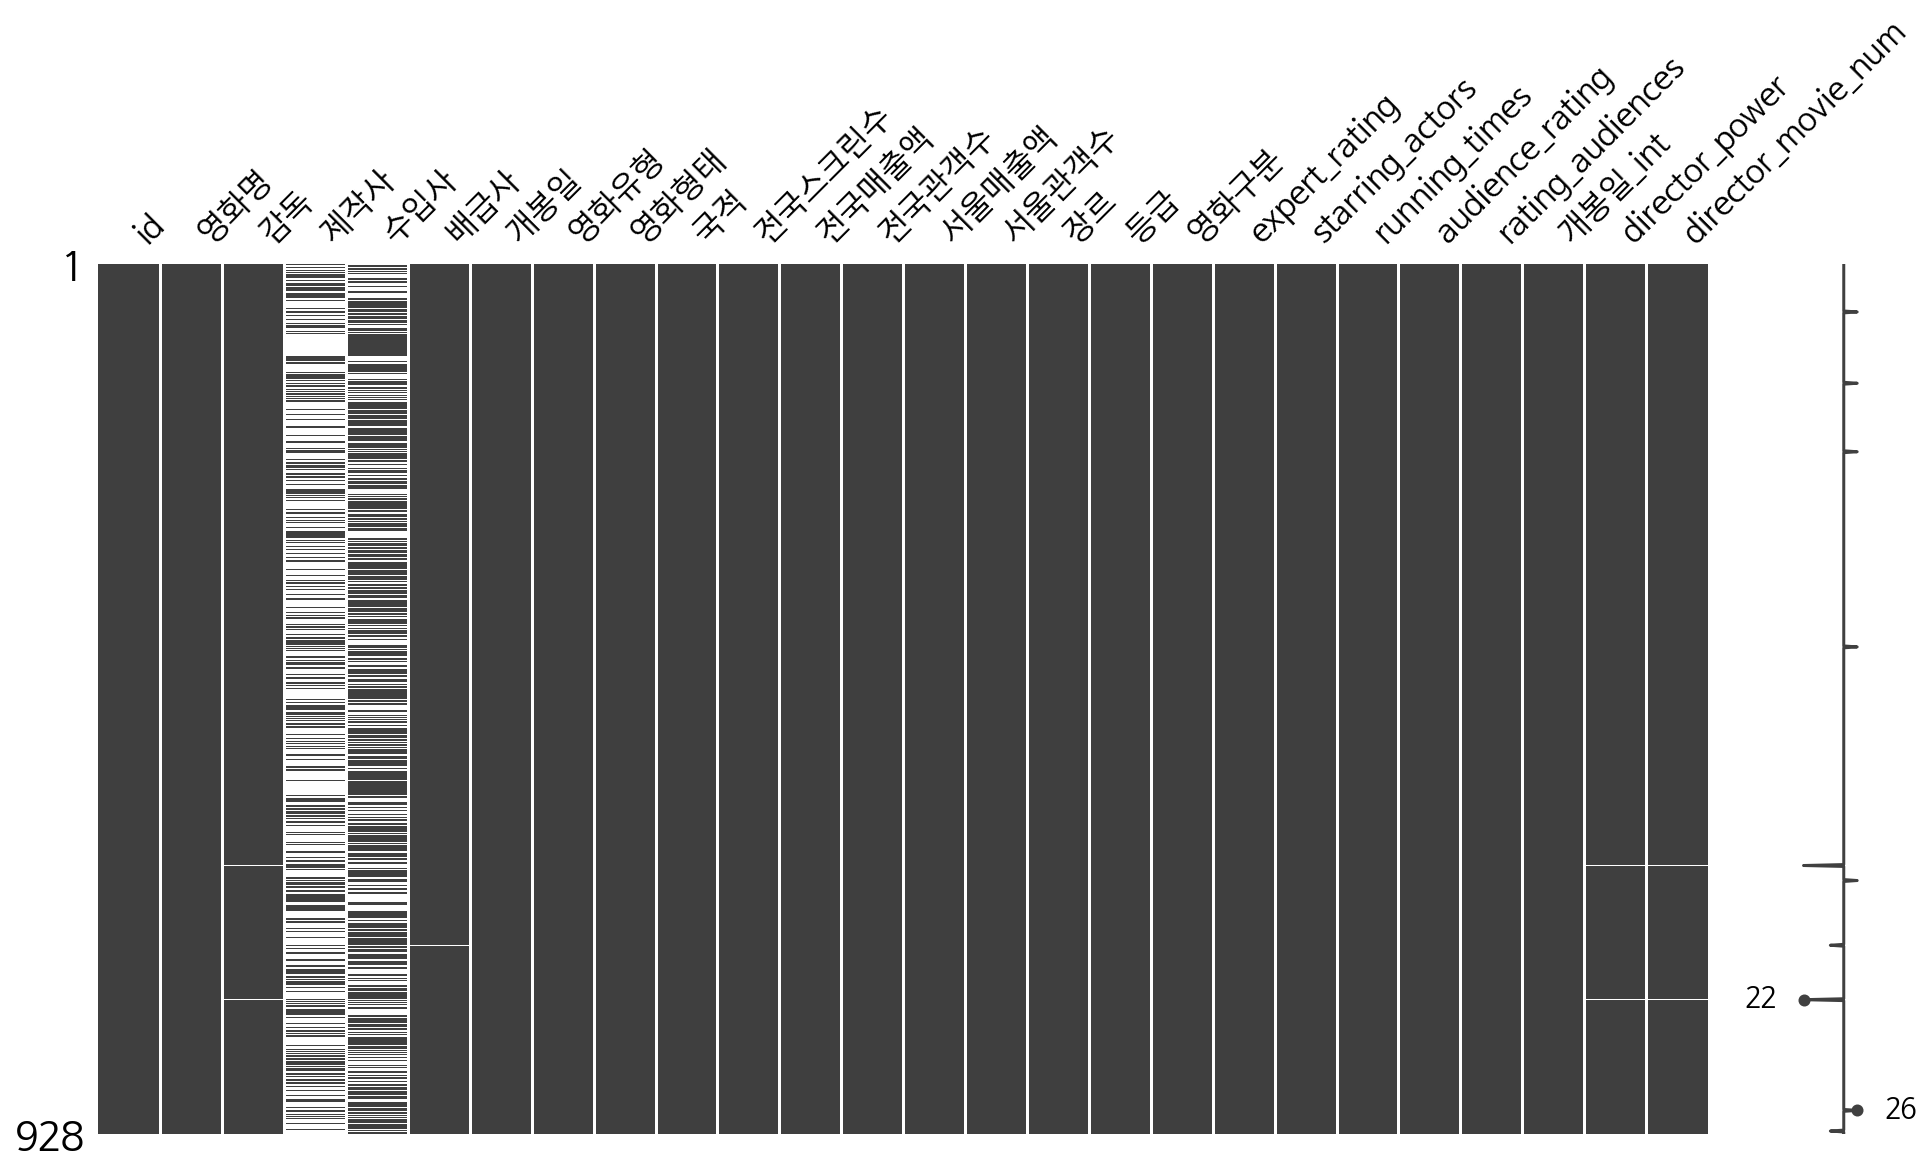

In [6]:
import missingno as msno
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)

msno.matrix(df_final_03, figsize=(16, 8))
plt.show()

In [243]:
#df_screen =  df_data_09['screen']
#df_screen

In [349]:
df_dummy_c1 = pd.get_dummies(df_data_09['distributor_group'], prefix='c1')

In [358]:
df_dummy_c2 = pd.get_dummies(df_data_09['rate'], prefix='c2')

In [359]:
#df_dummy_c3 = pd.get_dummies(df_data_09[''])

In [360]:
forcorr_cat = pd.concat([df_dummy_c1, df_dummy_c2], axis=1)

In [361]:
forcorr_df_data_09 = pd.concat([df_data_09, forcorr_cat], axis=1)

In [245]:
#df_dummy_screen =  pd.concat([df_dummy_c1, df_screen], axis=1)
#df_dummy_screen

In [246]:
df_dummy_screen[df_dummy_screen["c1_A"] == 1]['screen']

In [247]:
#sumA = sum(df_dummy_screen[df_dummy_screen["c1_A"] == 1]['screen'])
#sumB = sum(df_dummy_screen[df_dummy_screen["c1_B"] == 1]['screen'])
#sumC = sum(df_dummy_screen[df_dummy_screen["c1_C"] == 1]['screen'])
#sumD = sum(df_dummy_screen[df_dummy_screen["c1_D"] == 1]['screen'])

In [248]:
#lenA = len(df_dummy_screen[df_dummy_screen["c1_A"]==1])
#lenB = len(df_dummy_screen[df_dummy_screen["c1_B"]==1])
#lenC = len(df_dummy_screen[df_dummy_screen["c1_C"]==1])
#lenD = len(df_dummy_screen[df_dummy_screen["c1_D"]==1])

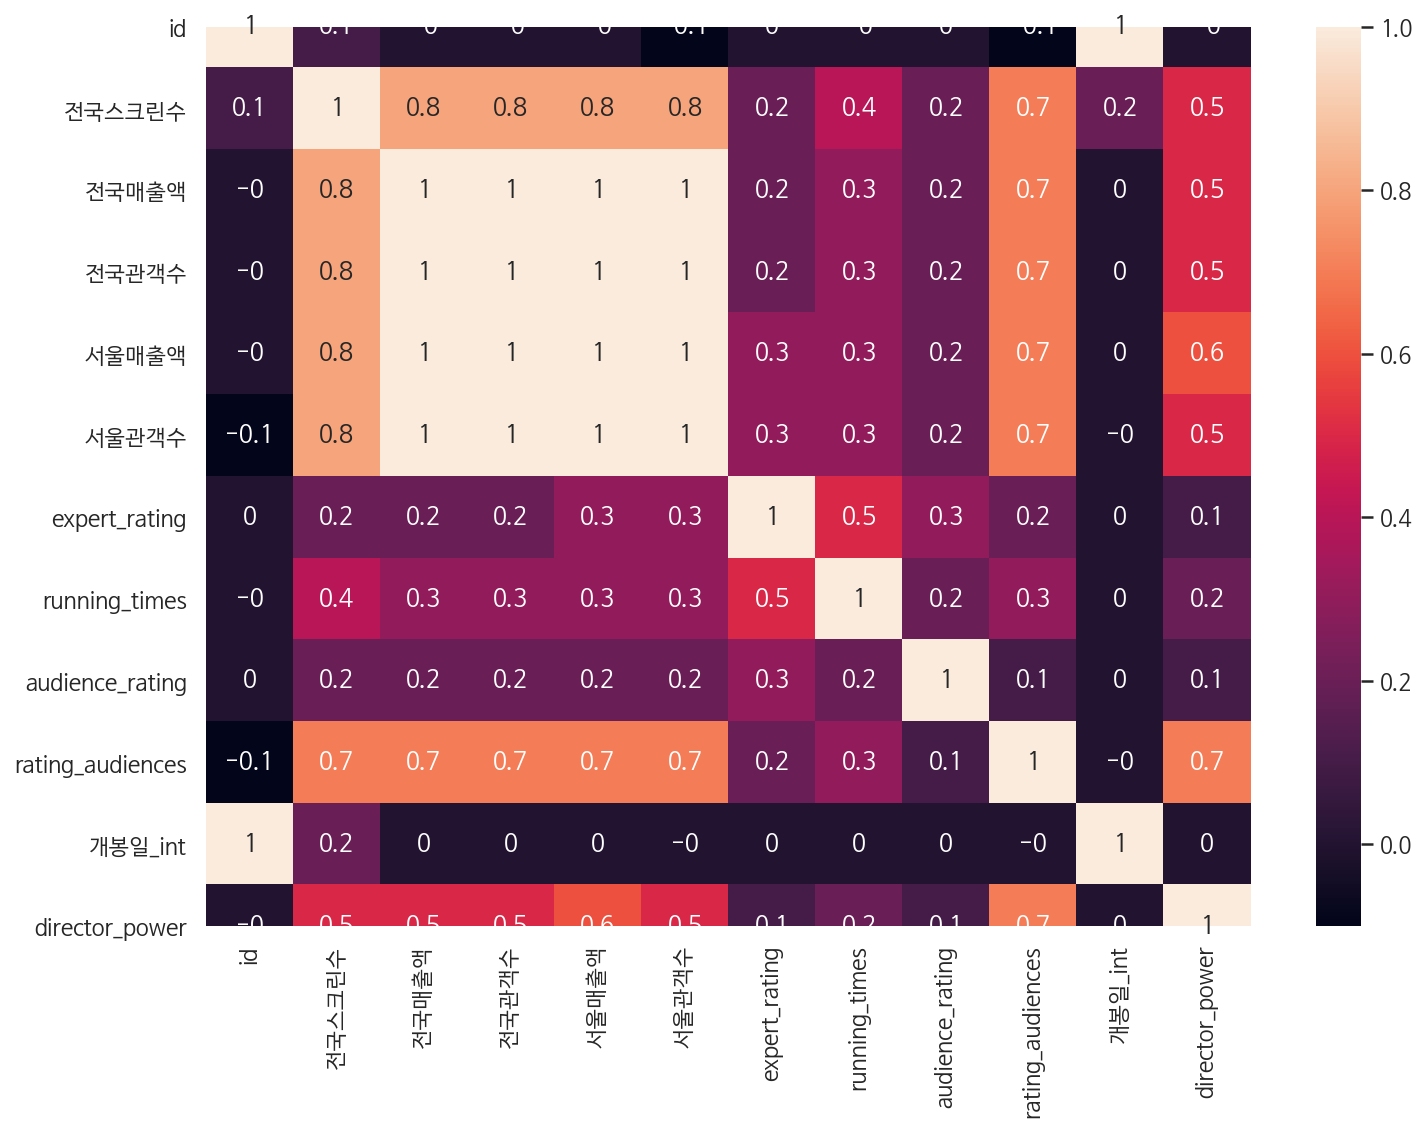

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 8.27)})
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)

correlation_matrix = df_final_03.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\shine\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shine\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


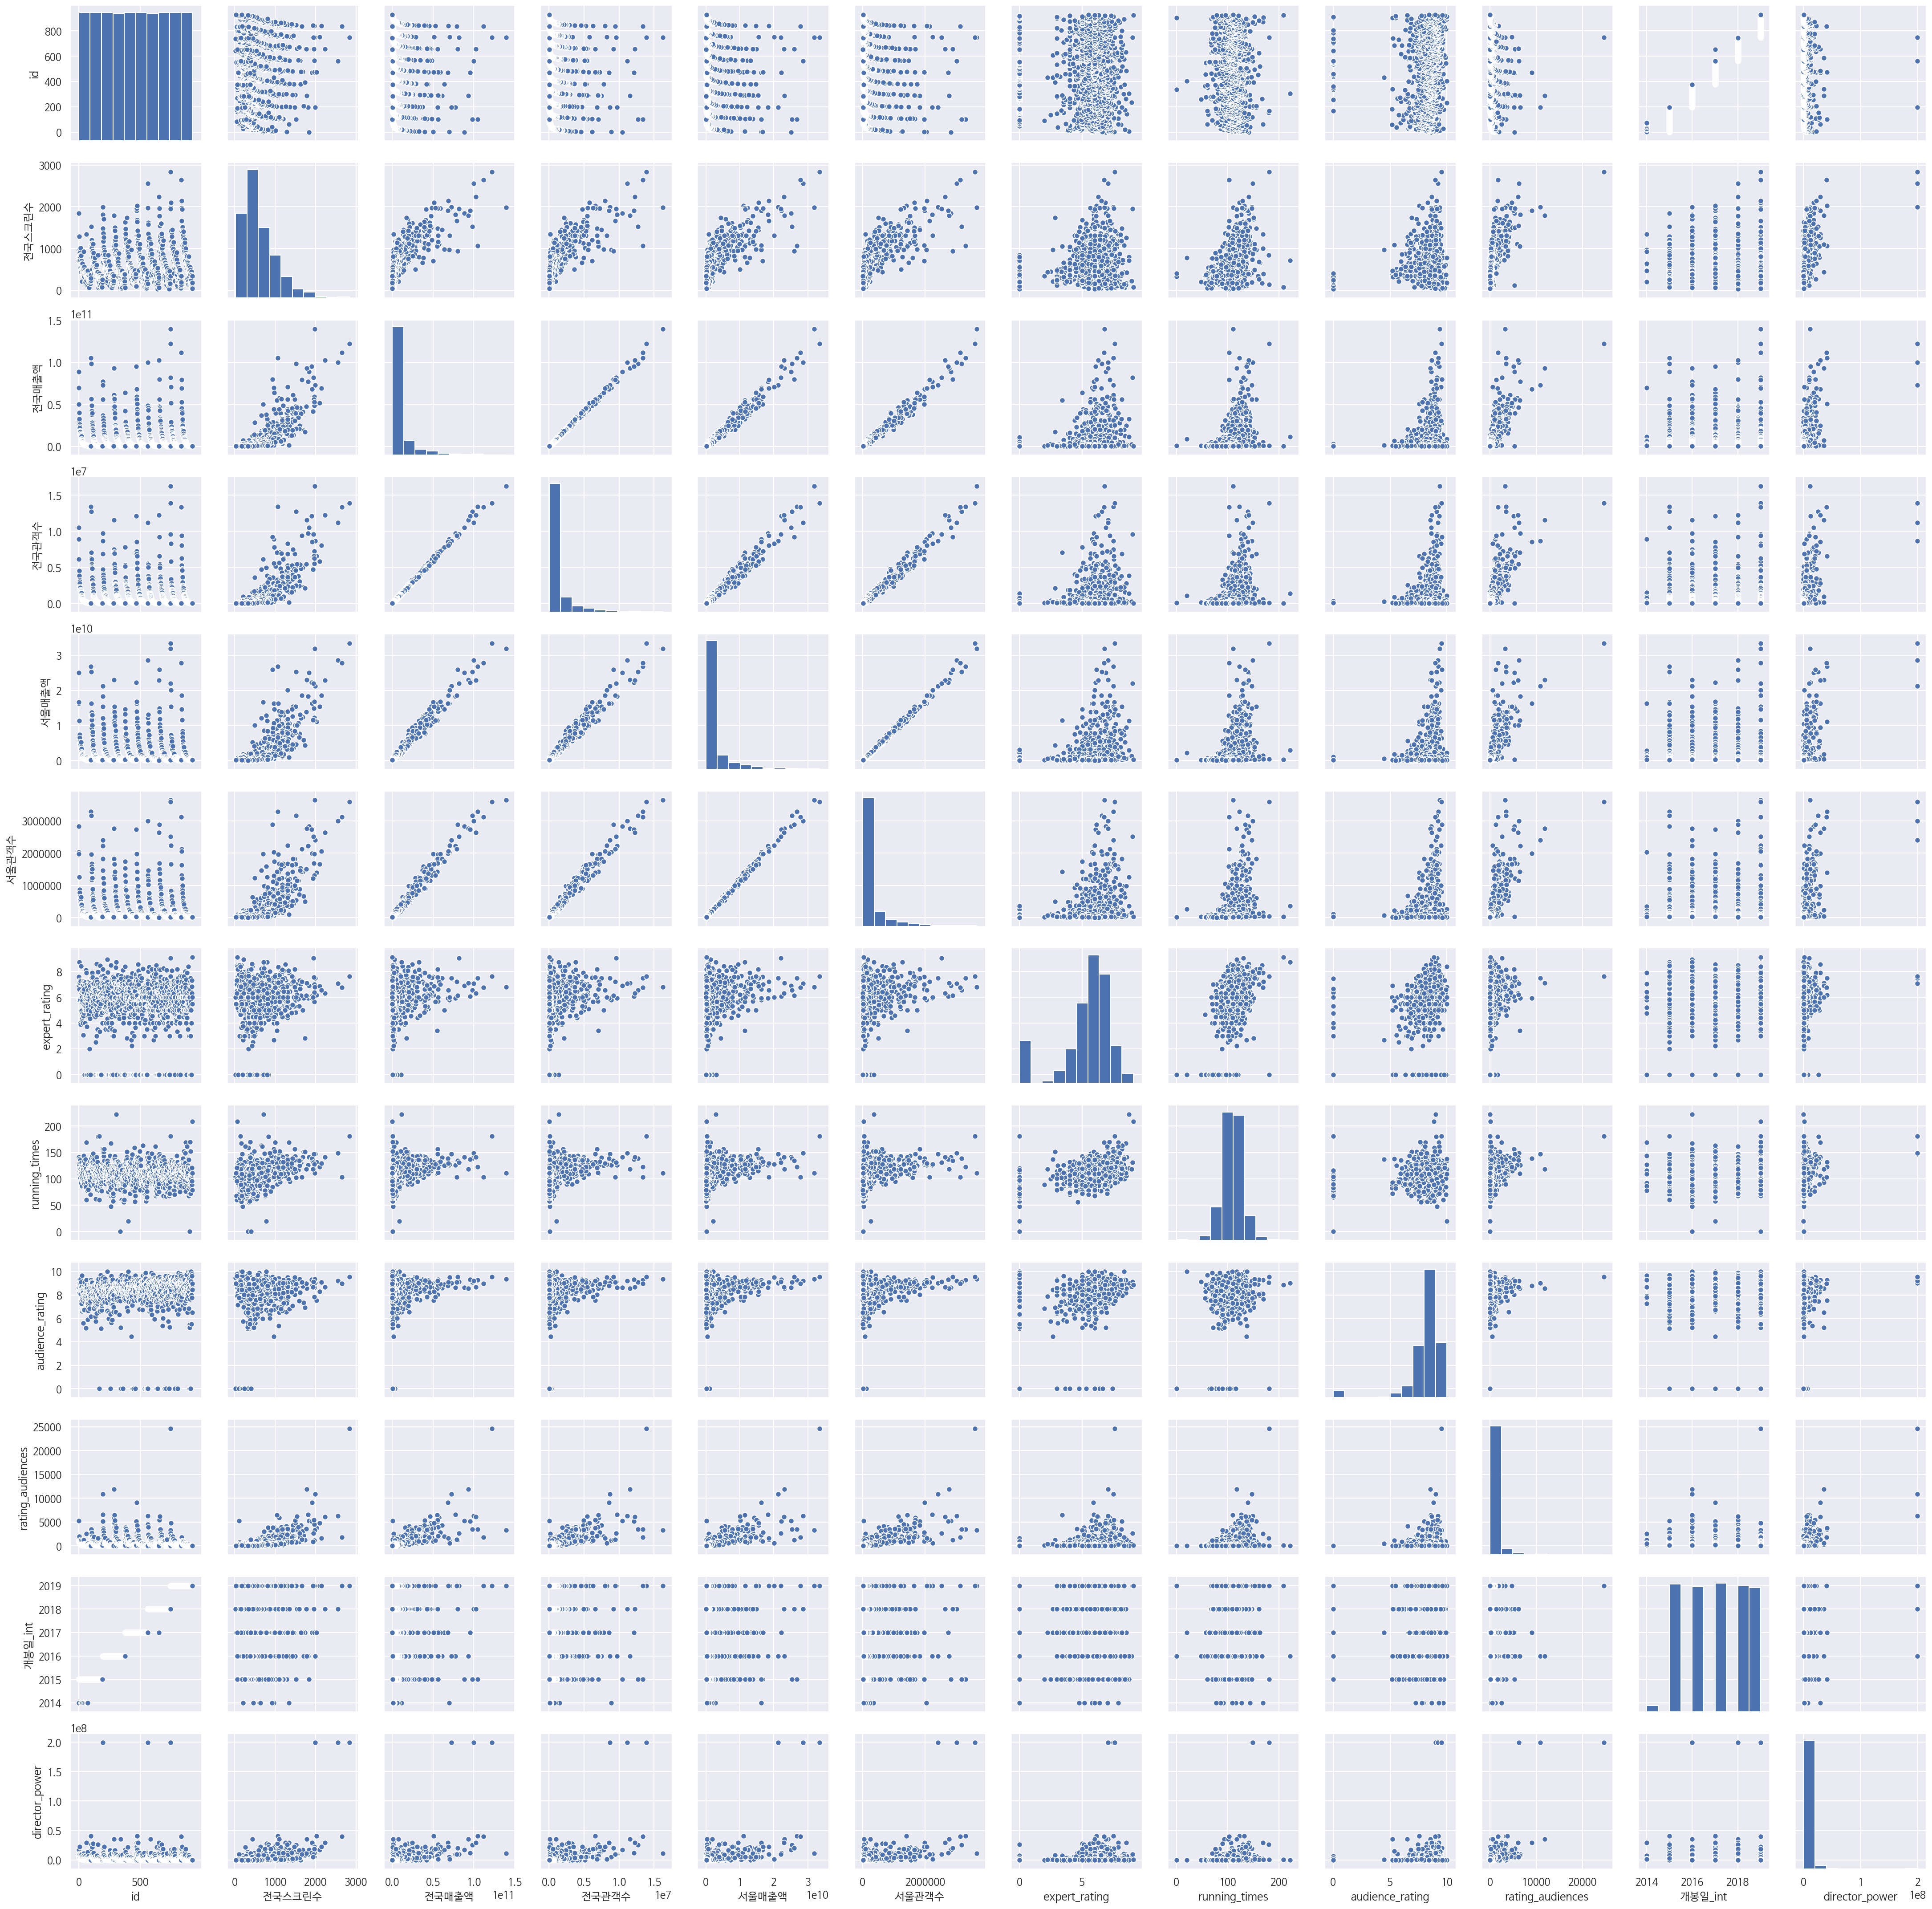

In [37]:
sns.pairplot(df_final_03)
plt.show()

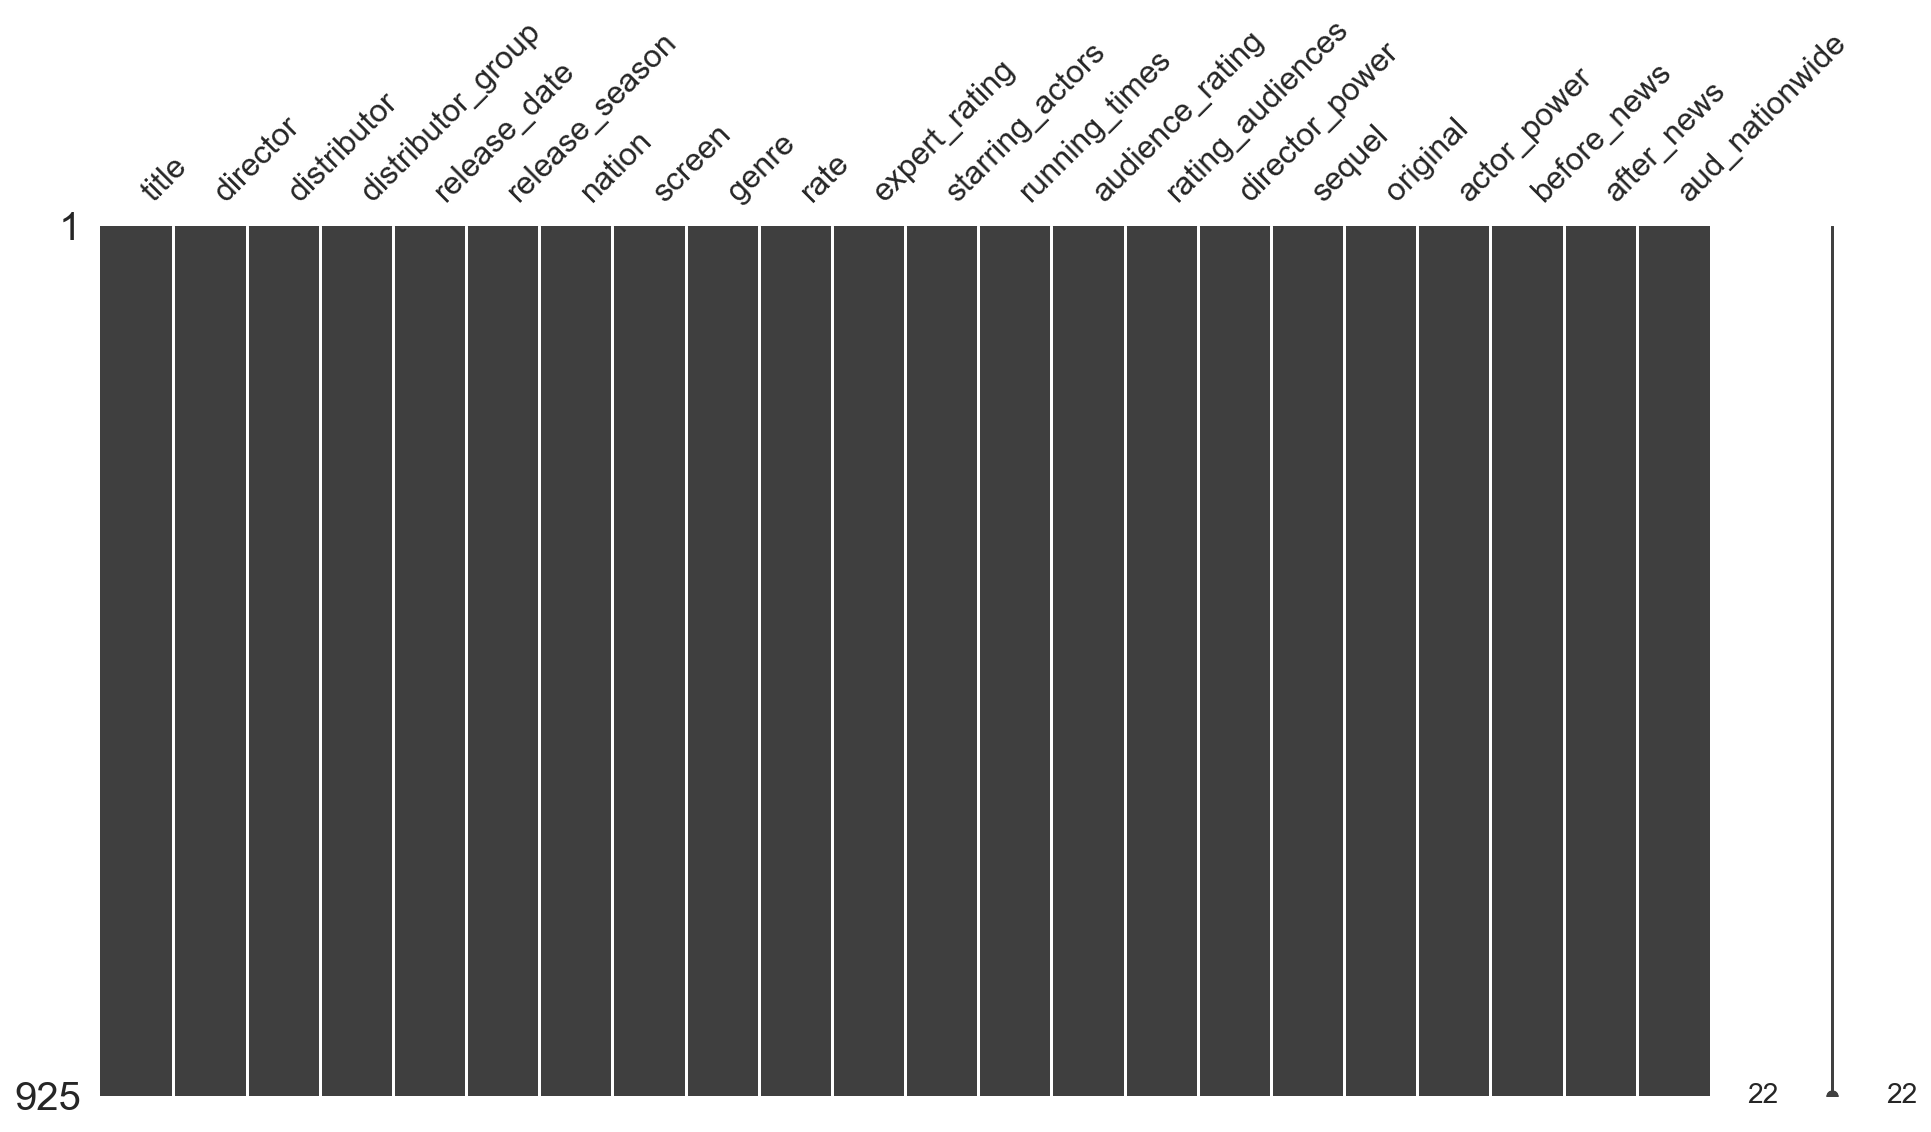

In [316]:
msno.matrix(df_data_09, figsize=(16, 8))
plt.show()

In [317]:
df_data_09.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 22 columns):
title                925 non-null object
director             925 non-null object
distributor          925 non-null object
distributor_group    925 non-null object
release_date         925 non-null object
release_season       925 non-null object
nation               925 non-null object
screen               925 non-null int64
genre                925 non-null object
rate                 925 non-null object
expert_rating        925 non-null float64
starring_actors      925 non-null object
running_times        925 non-null int64
audience_rating      925 non-null float64
rating_audiences     925 non-null int64
director_power       925 non-null float64
sequel               925 non-null int64
original             925 non-null int64
actor_power          925 non-null int64
before_news          925 non-null float64
after_news           925 non-null float64
aud_nationwide       925 non-null i

In [27]:
df_data_09.describe()

screen  expert_rating  running_times  audience_rating  \
count   925.000000     925.000000     925.000000       925.000000   
mean    615.031351       5.400735     109.778378         8.166960   
std     419.167442       2.048343      19.932613         1.492485   
min      28.000000       0.000000      48.000000         0.000000   
25%     322.000000       5.000000      97.000000         7.867150   
50%     512.000000       5.920000     110.000000         8.457944   
75%     827.000000       6.700000     122.000000         8.919948   
max    2835.000000       9.110000     222.000000        10.000000   

       rating_audiences  director_power      sequel    original   actor_power  \
count        925.000000    9.250000e+02  925.000000  925.000000  9.250000e+02   
mean         673.470270    3.755600e+06    0.454054    0.308108  8.945175e+07   
std         1386.145334    1.252446e+07    0.498154    0.461961  1.498437e+08   
min            0.000000    0.000000e+00    0.000000    0.000000  0.000000e+00   
25%           81.000000    1.502150e+05    0.000000    0.000000  4.066096e+06   
50%          234.000000    8.145870e+05    0.000000    0.000000  2.987306e+07   
75%          696.000000    3.417629e+06    1.000000    1.000000  1.003499e+08   
max        24610.000000    1.989550e+08    1.000000    1.000000  1.151033e+09   

        before_news    after_news  aud_nationwide  
count  9.250000e+02    925.000000    9.250000e+02  
mean   9.176964e+04    613.630270    1.099422e+06  
std    4.481563e+05   1205.564874    2.009962e+06  
min    1.000000e+00      0.000000    3.186600e+04  
25%    8.580000e+02     95.000000    9.701700e+04  
50%    4.193000e+03    279.000000    2.860420e+05  
75%    1.743900e+04    688.000000    1.124815e+06  
max    6.013797e+06  17083.000000    1.626336e+07

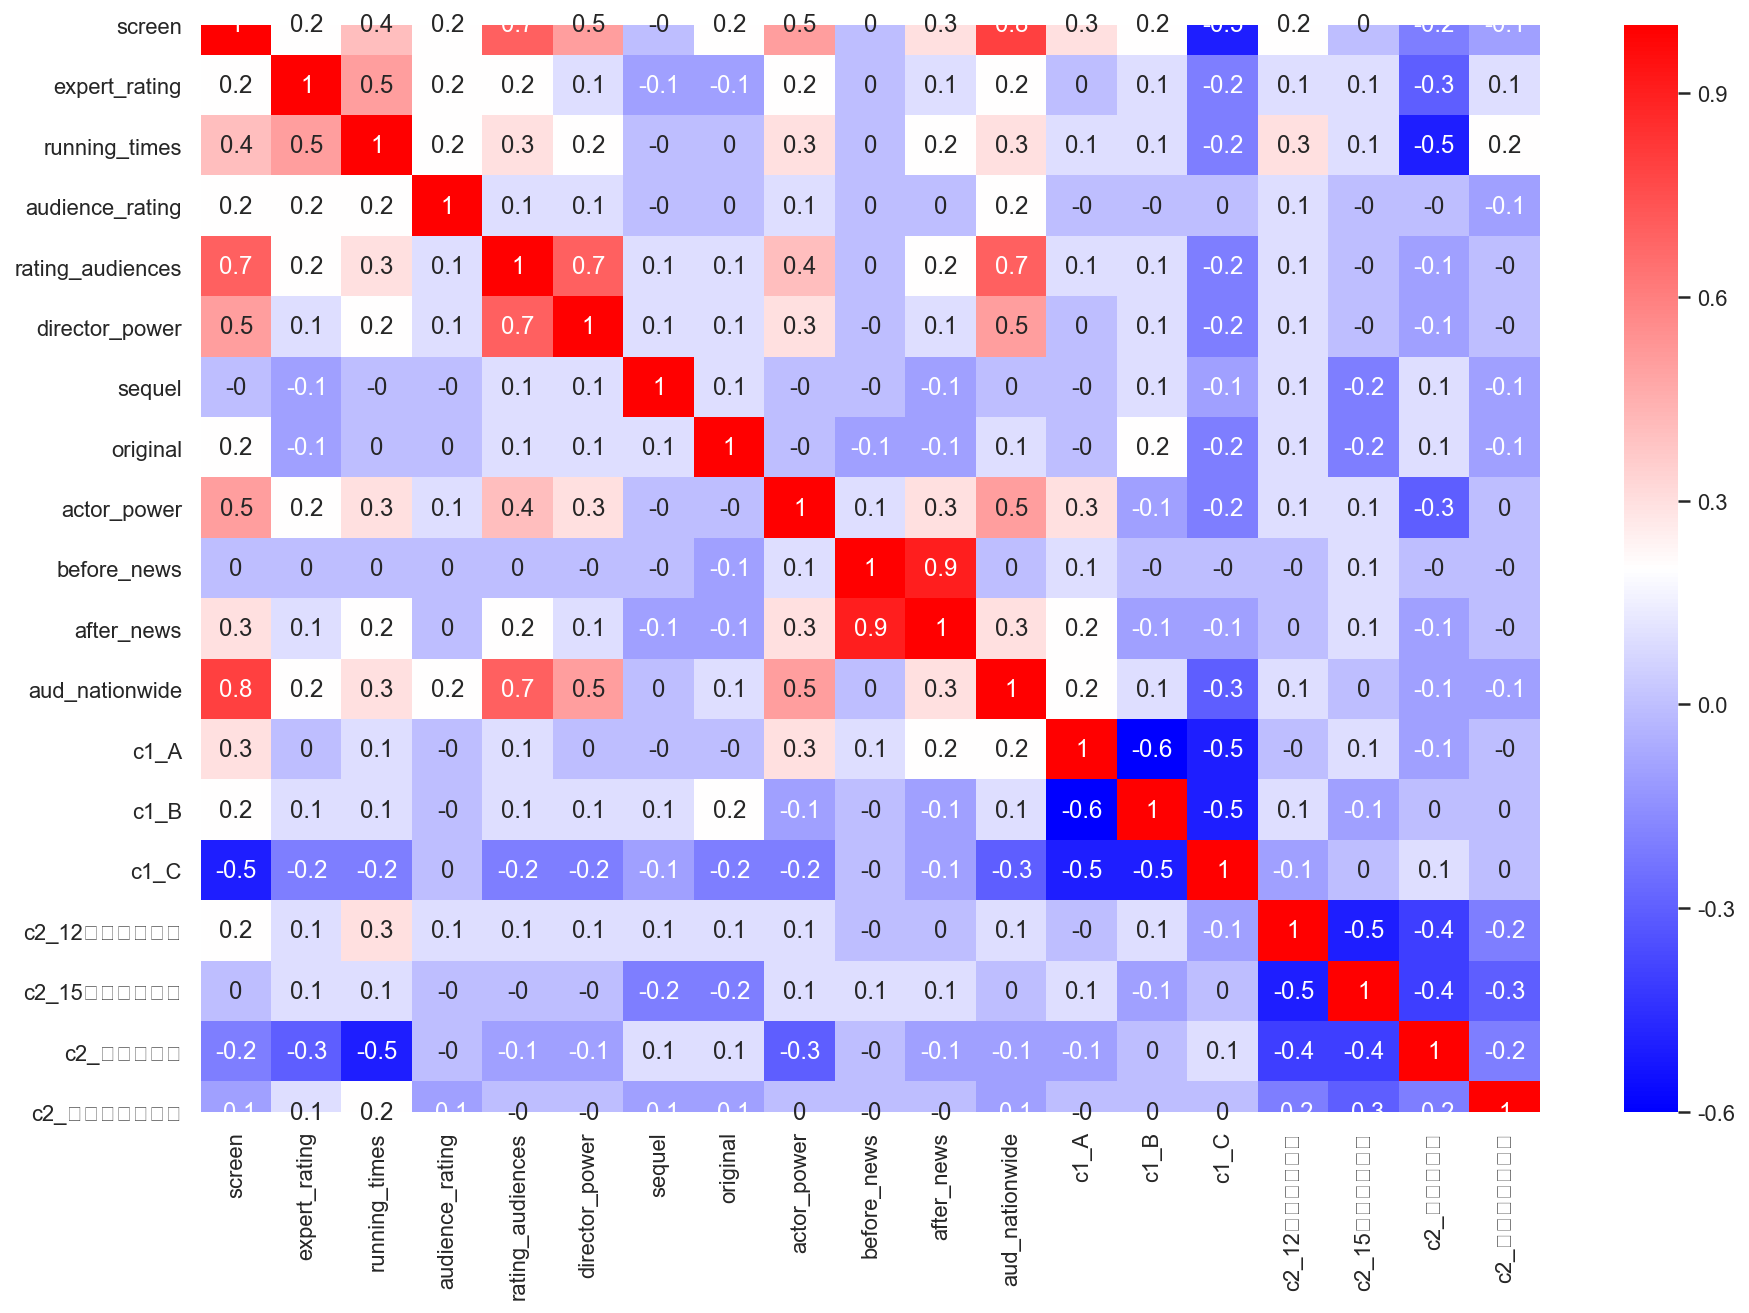

In [365]:
correlation_matrix = forcorr_df_data_09.corr().round(1)
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

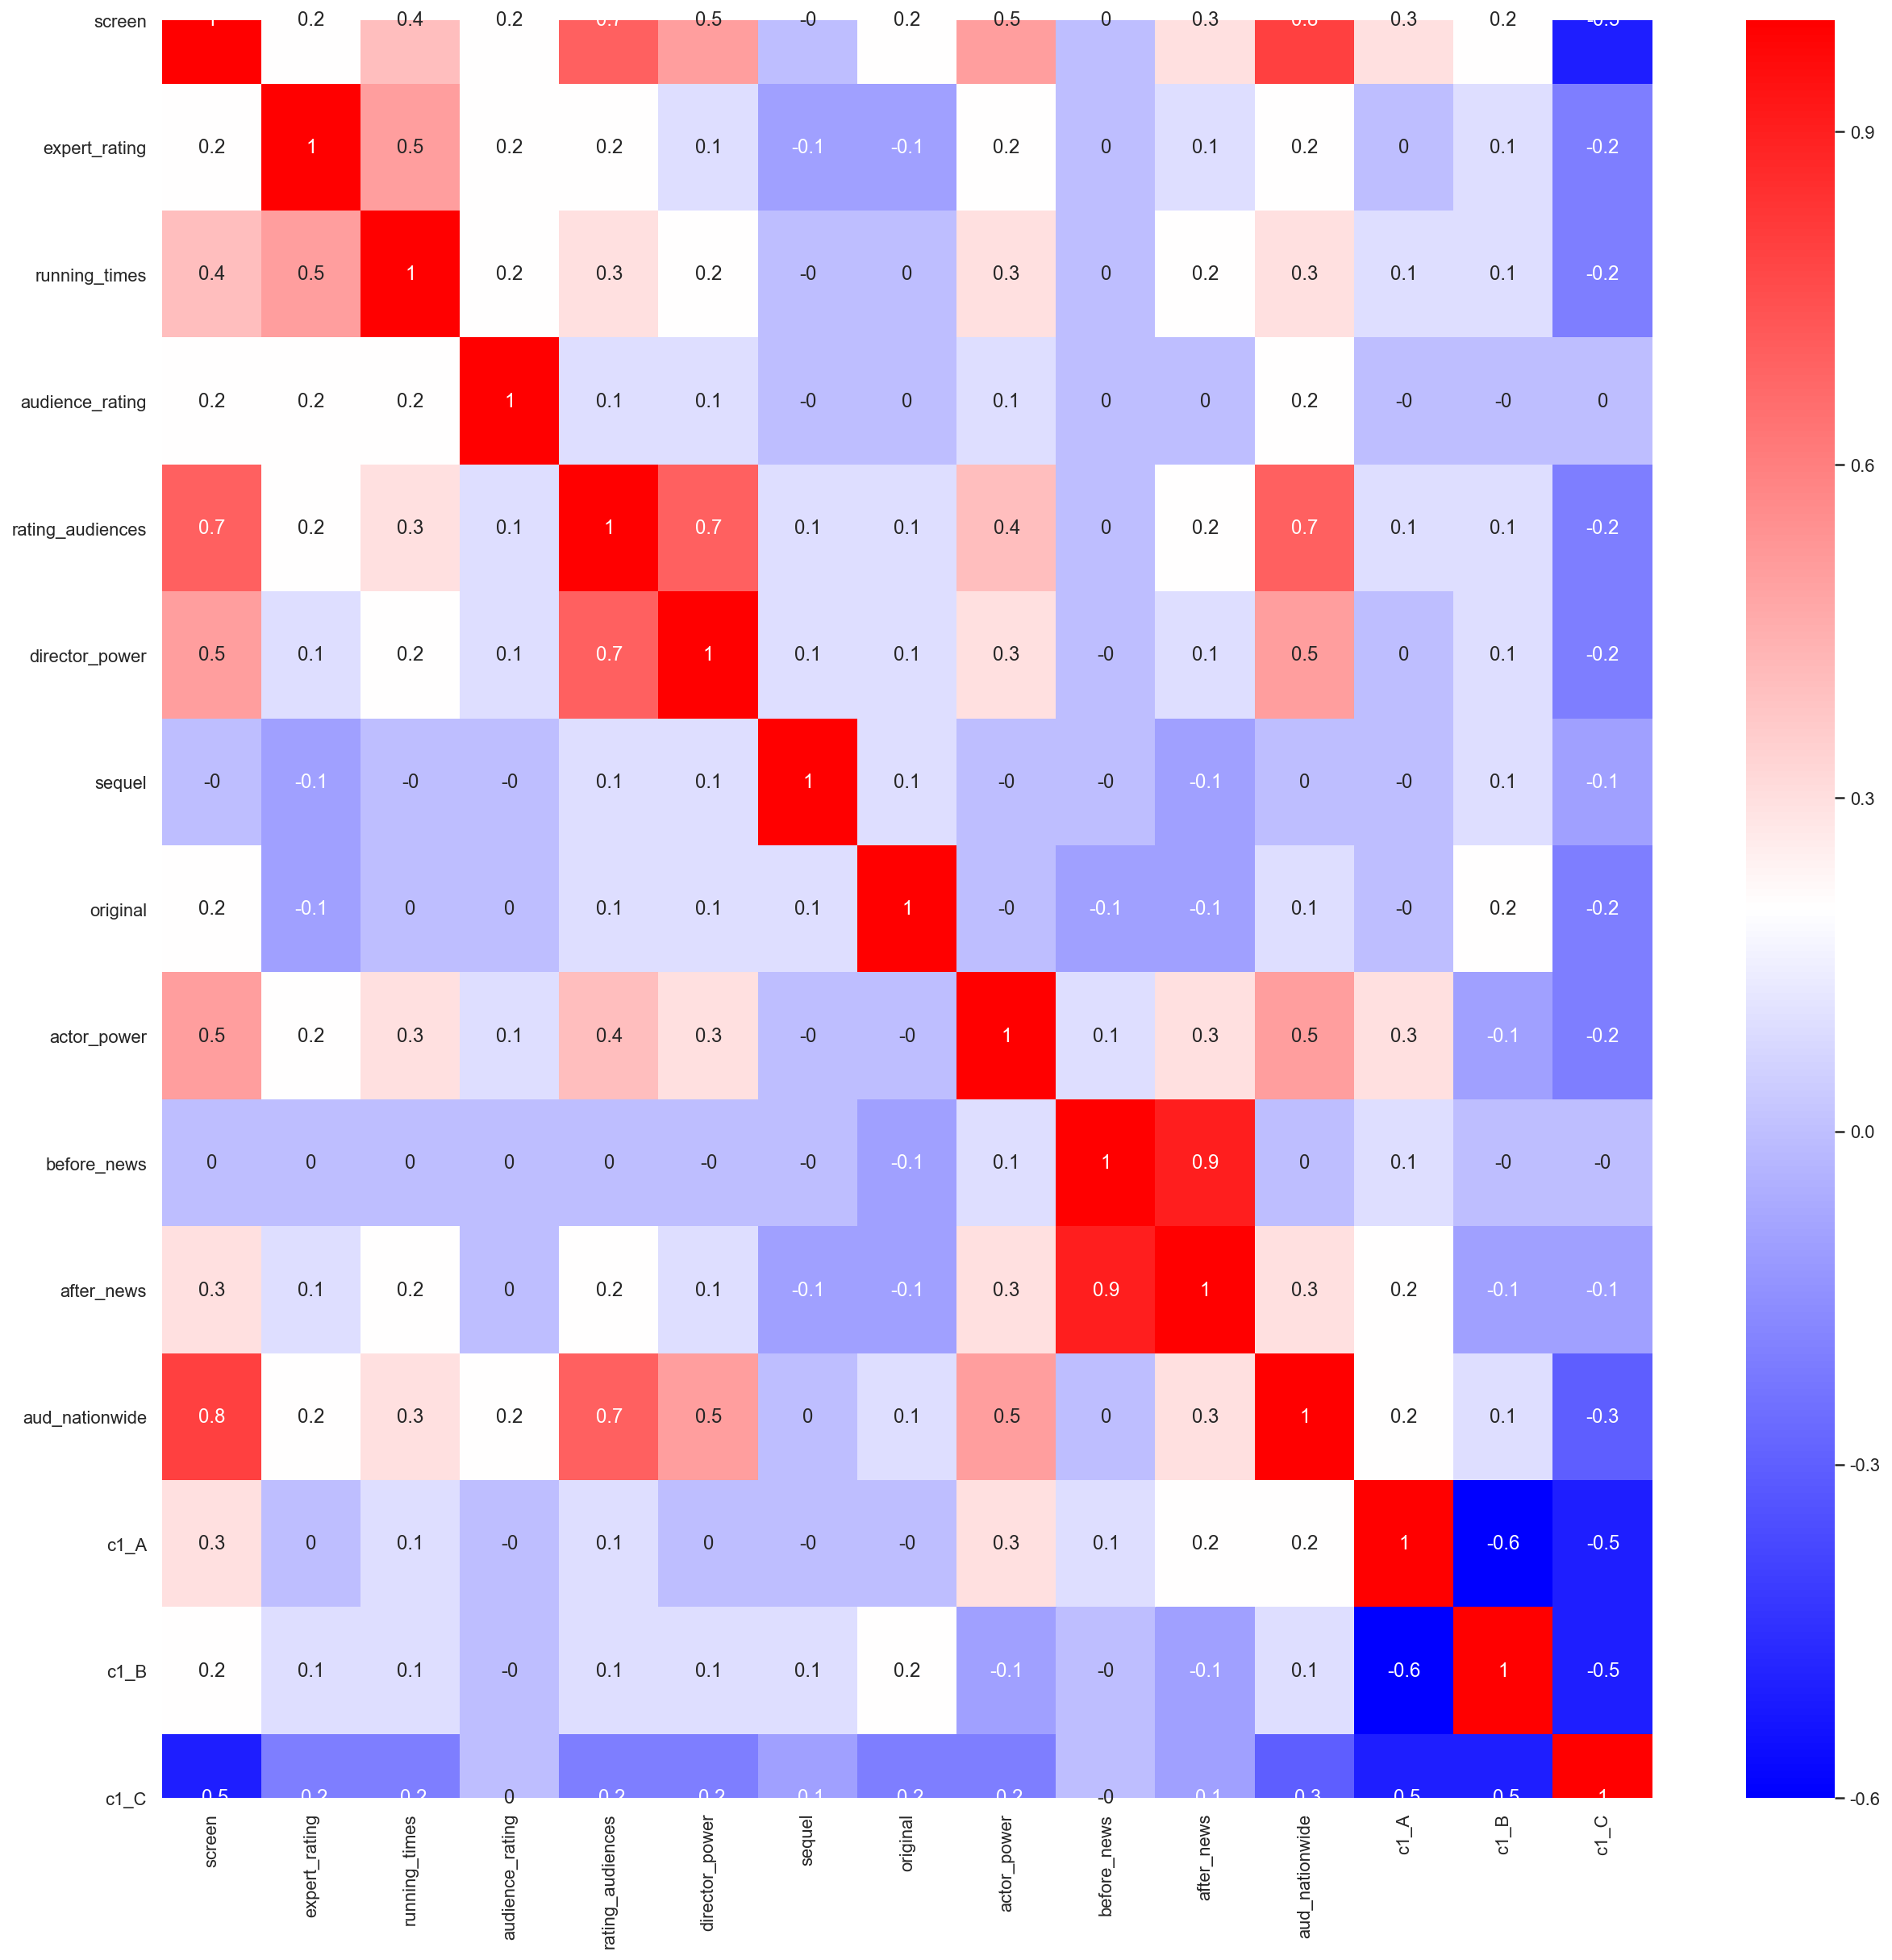

In [347]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7, 20.27)})

correlation_matrix = df_data_09.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

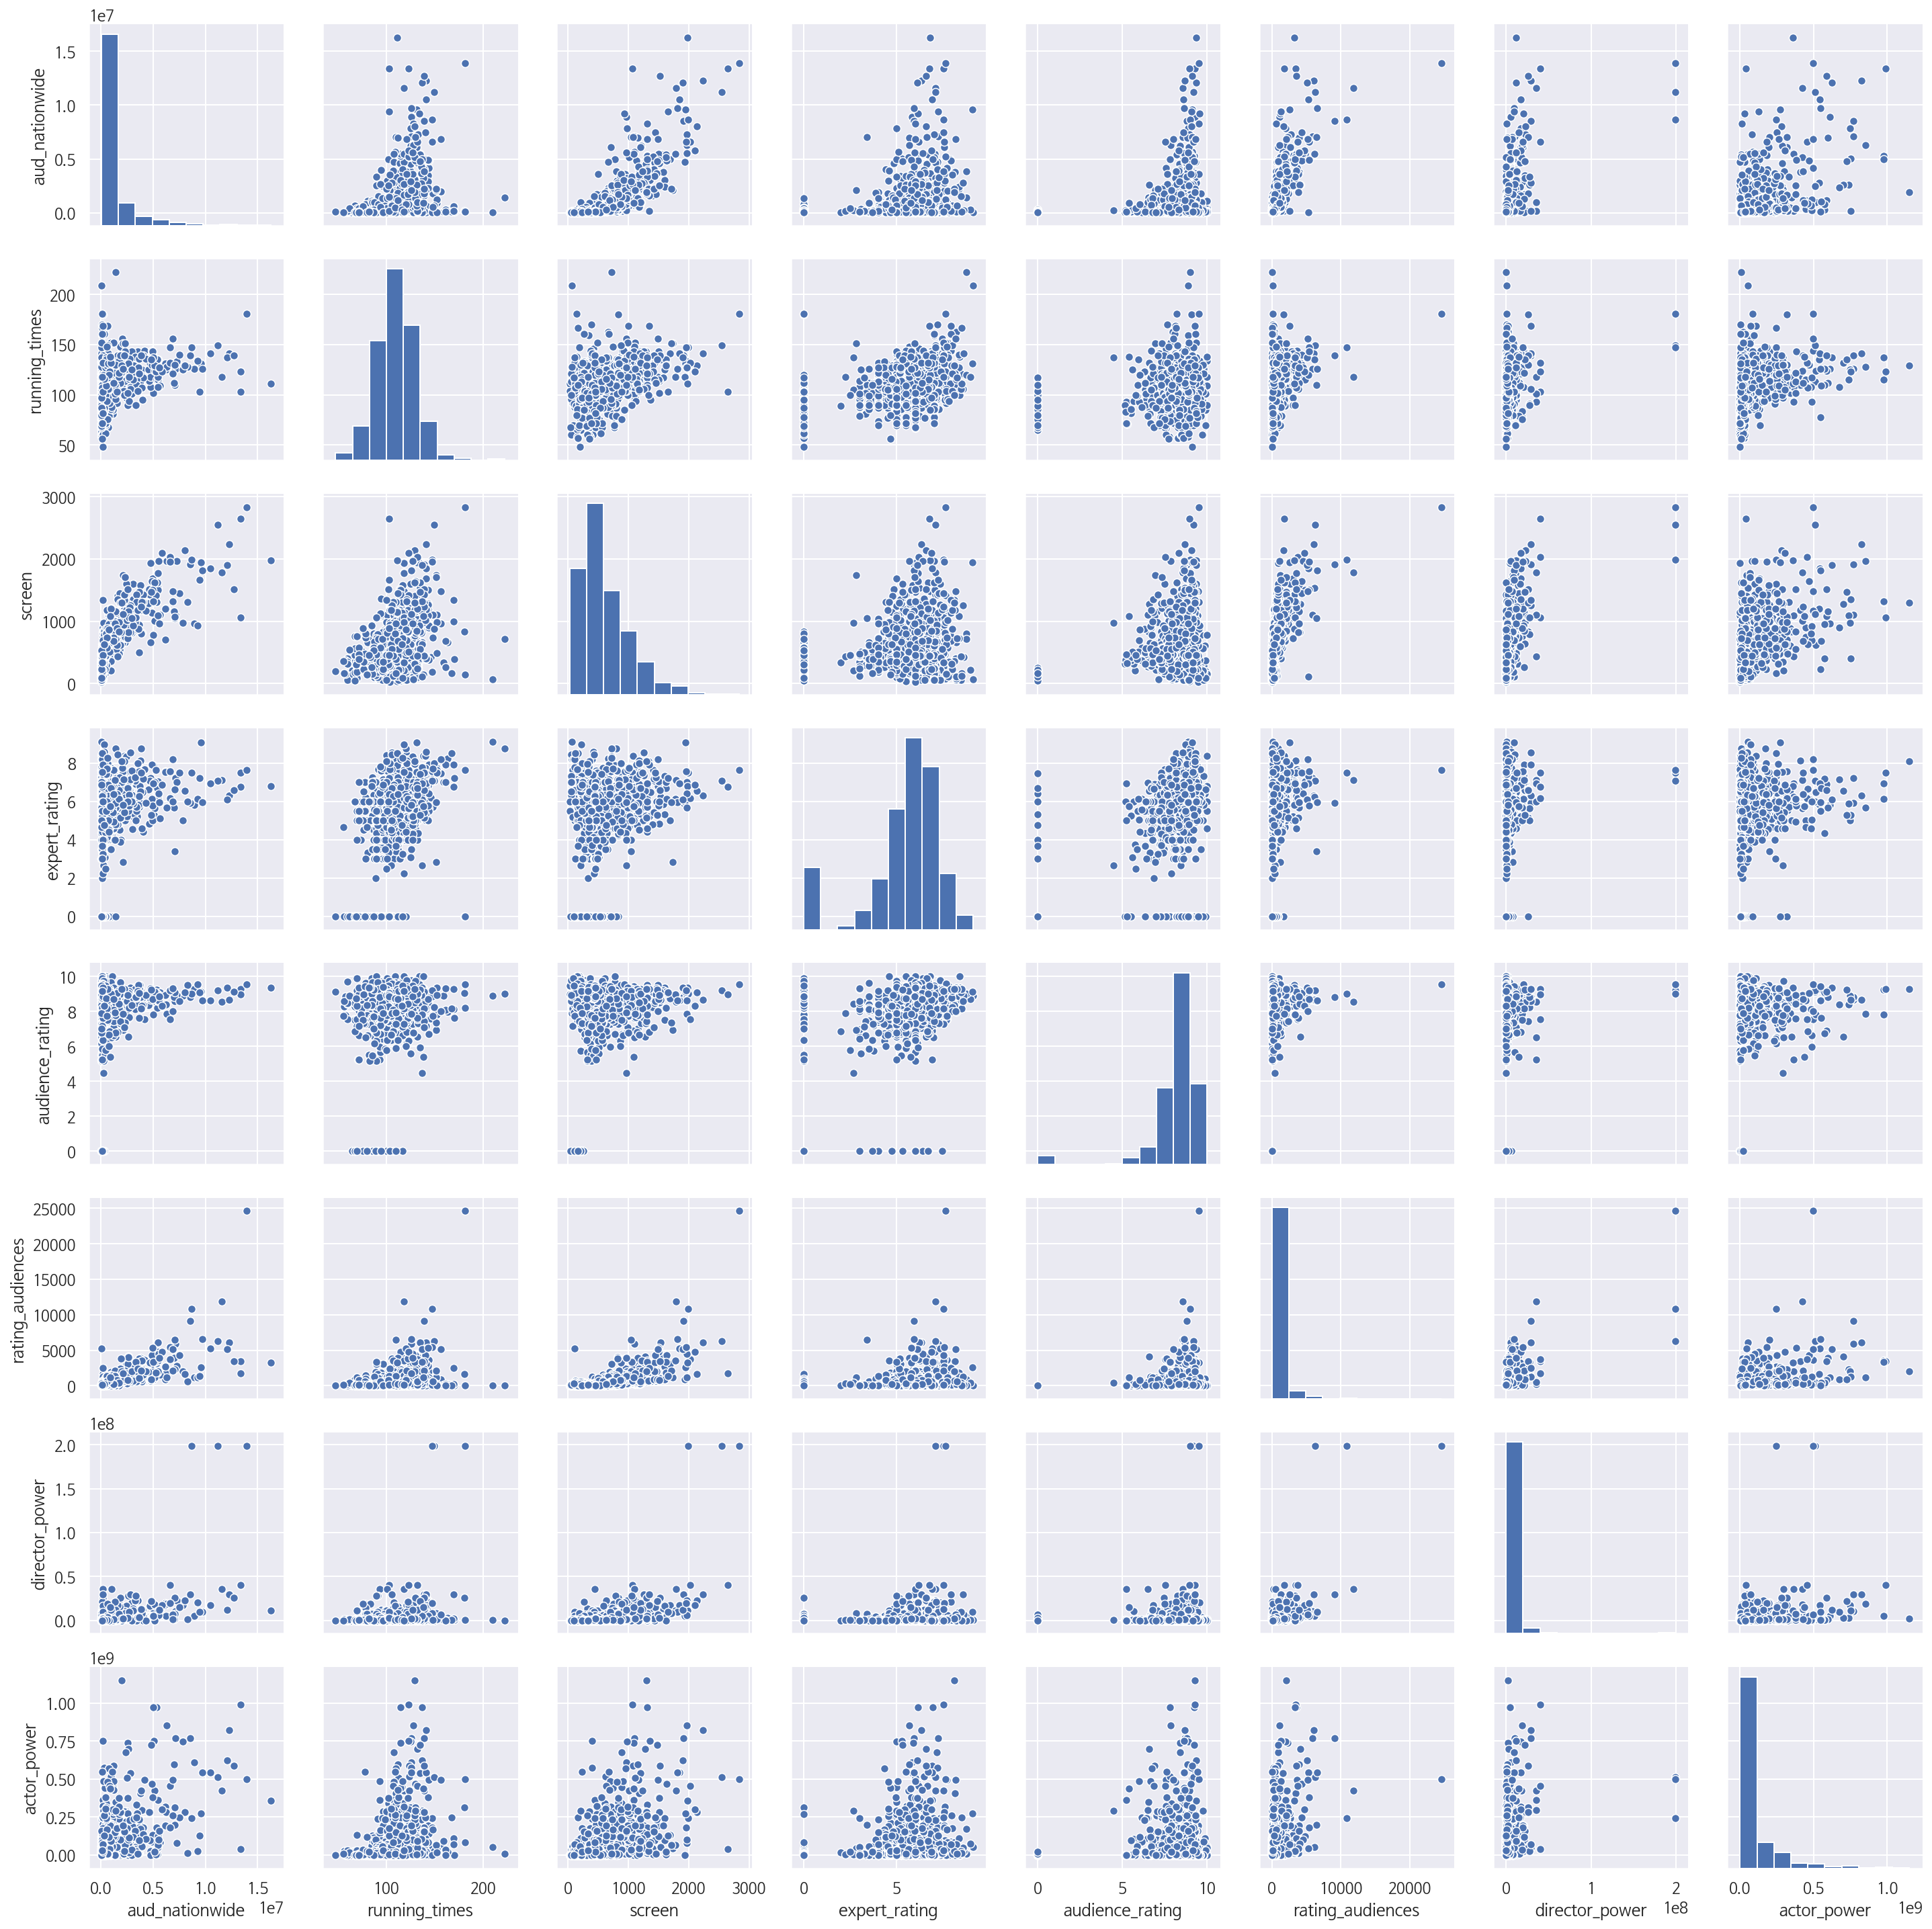

In [371]:
sns.pairplot(df_data_09[['aud_nationwide', 'running_times', 'screen', 'expert_rating', 'audience_rating', 'rating_audiences', 'director_power', 'actor_power']])
plt.show()

#### column1 : distributor

In [14]:
df_distributor = df_final_03.groupby('배급사').size().reset_index()
df_distributor = df_distributor.rename(columns={0:'count'})
df_distributor_sort = df_distributor.sort_values('count', ascending=False)
df_distributor_sort = df_distributor_sort.reset_index().drop('index', axis=1)
df_distributor_sort

배급사  count
0                  씨제이이앤엠(주)     85
1        유니버설픽쳐스인터내셔널 코리아(유)     77
2        (주)넥스트엔터테인먼트월드(NEW)     67
3              워너브러더스 코리아(주)     63
4              롯데쇼핑㈜롯데엔터테인먼트     52
..                       ...    ...
135                  (주)시네마달      1
136  (주)스톰픽쳐스코리아,주식회사 우리네트웍스      1
137  (주)스톰픽쳐스코리아,(주)페퍼민트앤컴퍼니      1
138       (주)스마일이엔티,(주)영화사오원      1
139         힘컨텐츠(주),(주)디스테이션      1

[140 rows x 2 columns]

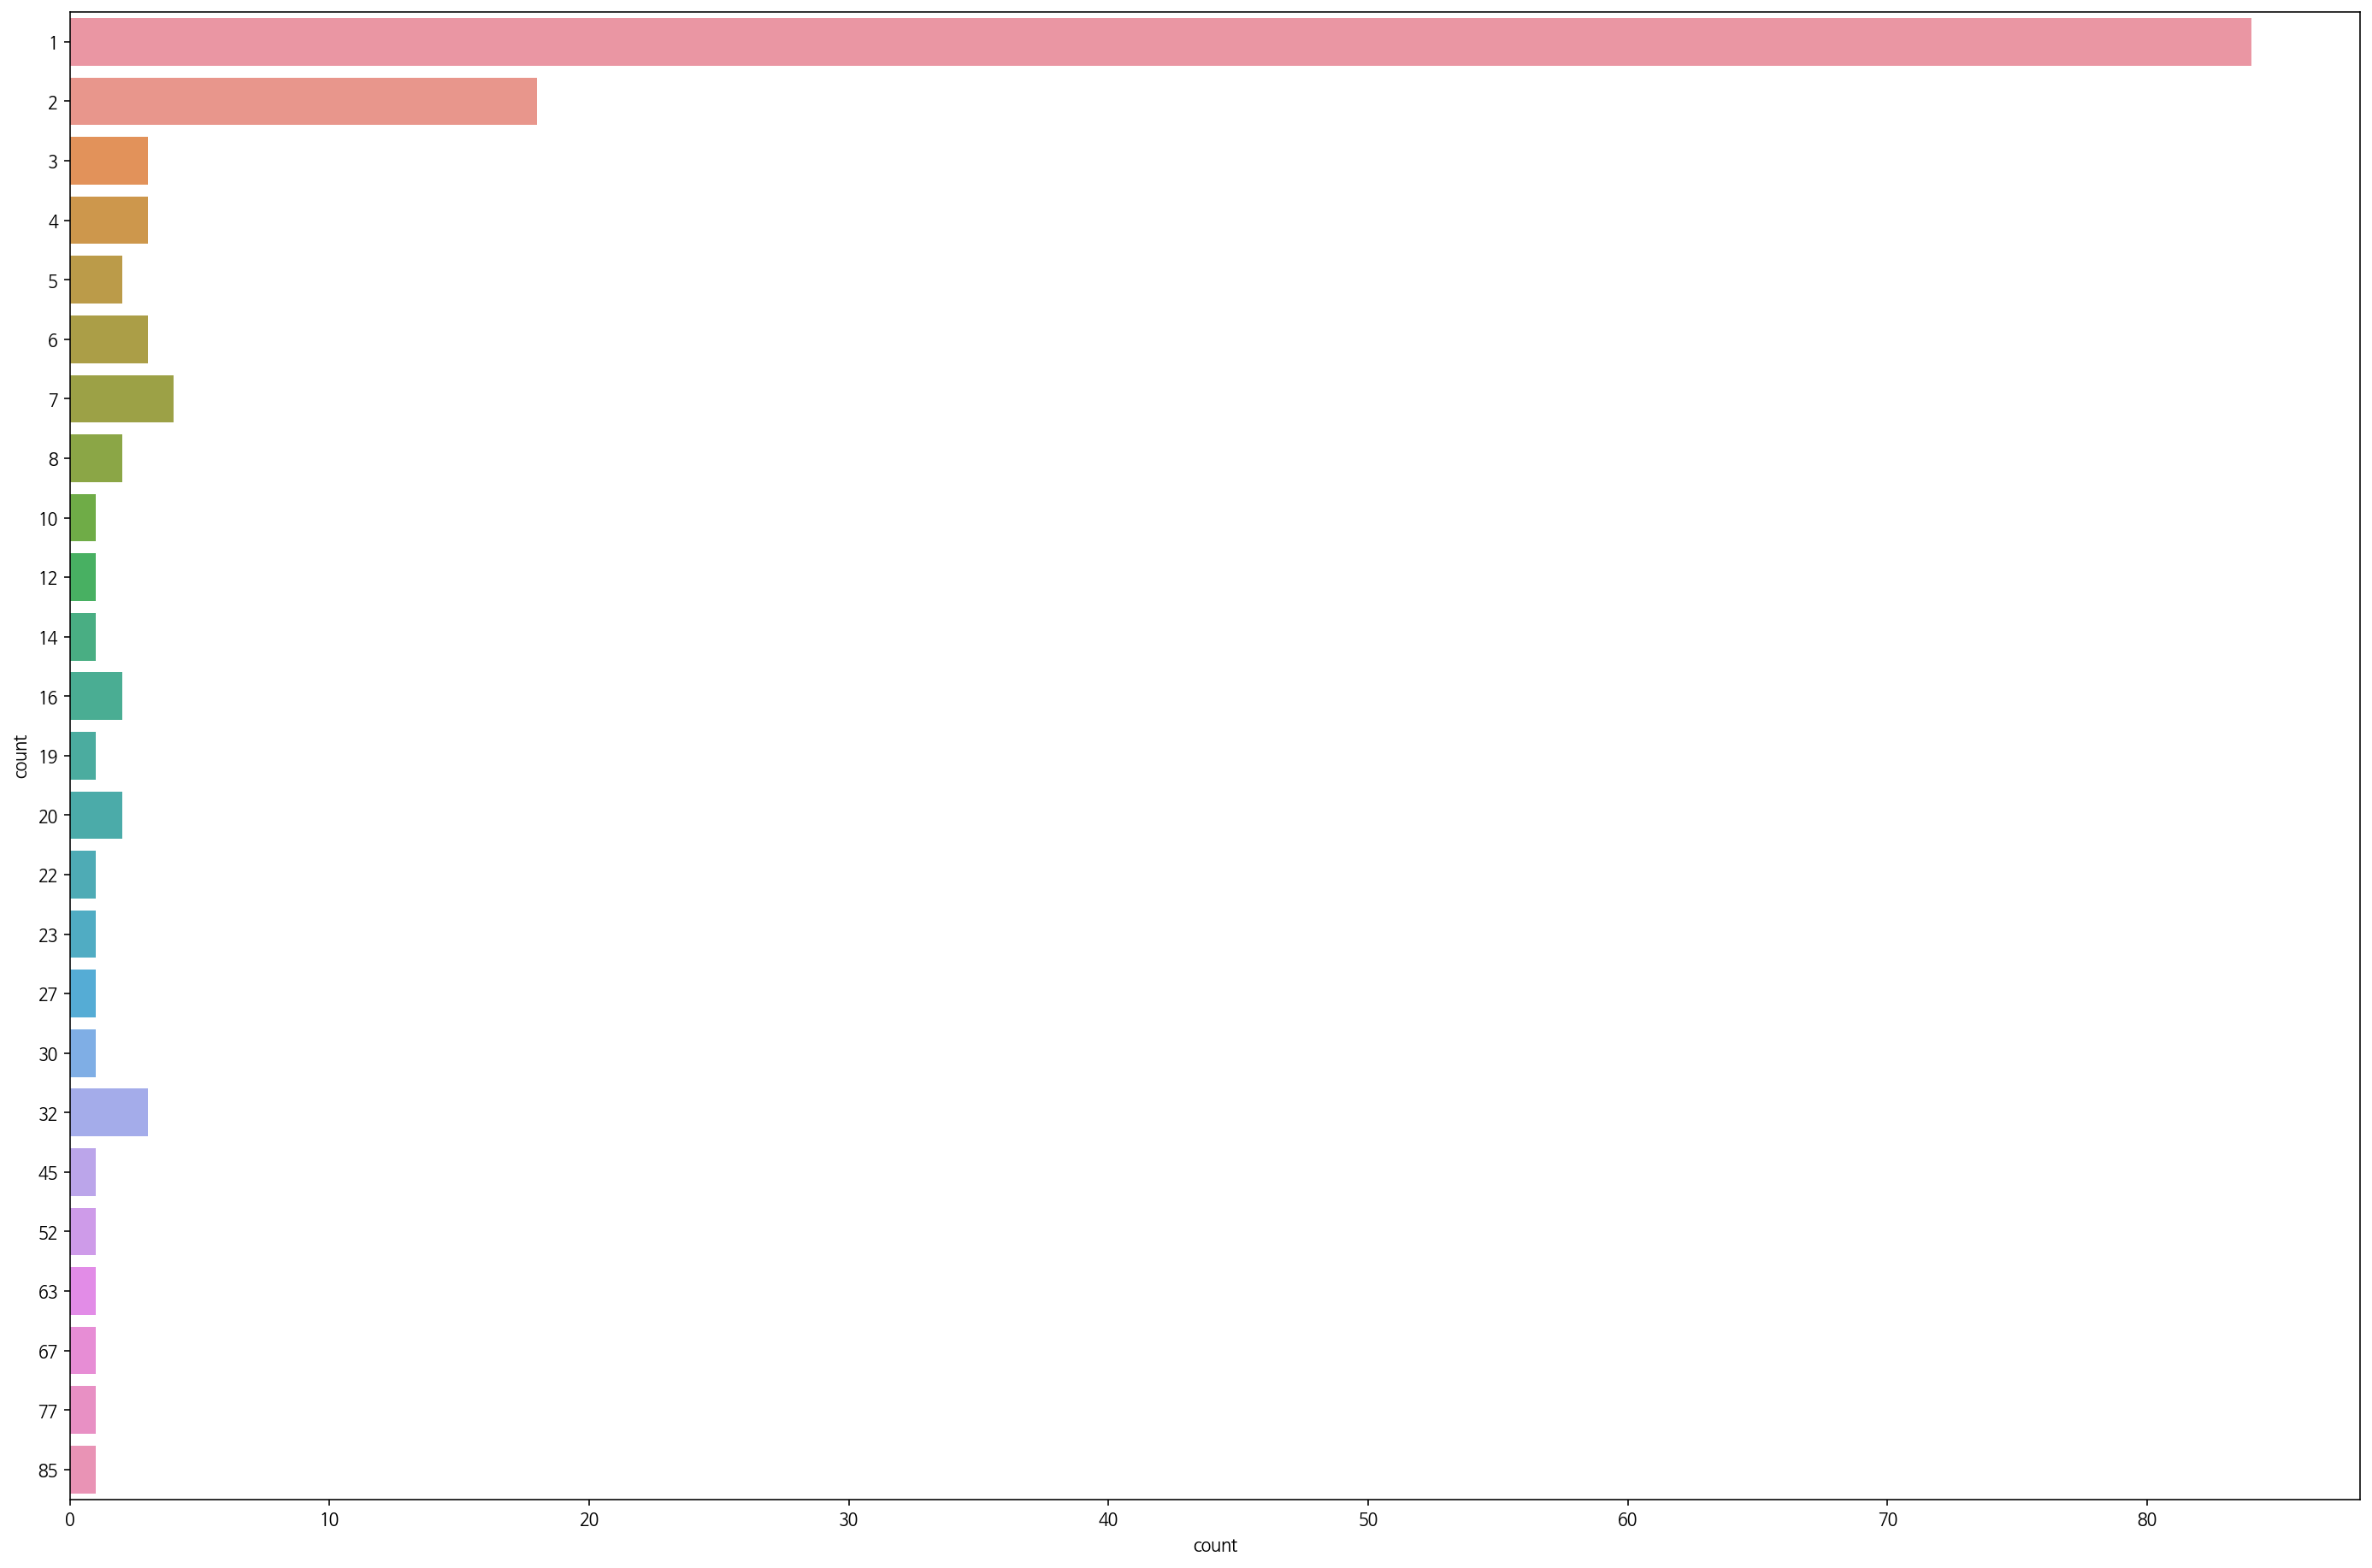

In [30]:
plt.figure(figsize=(24,16))
sns.countplot(y='count', data=df_distributor_sort)
plt.show()

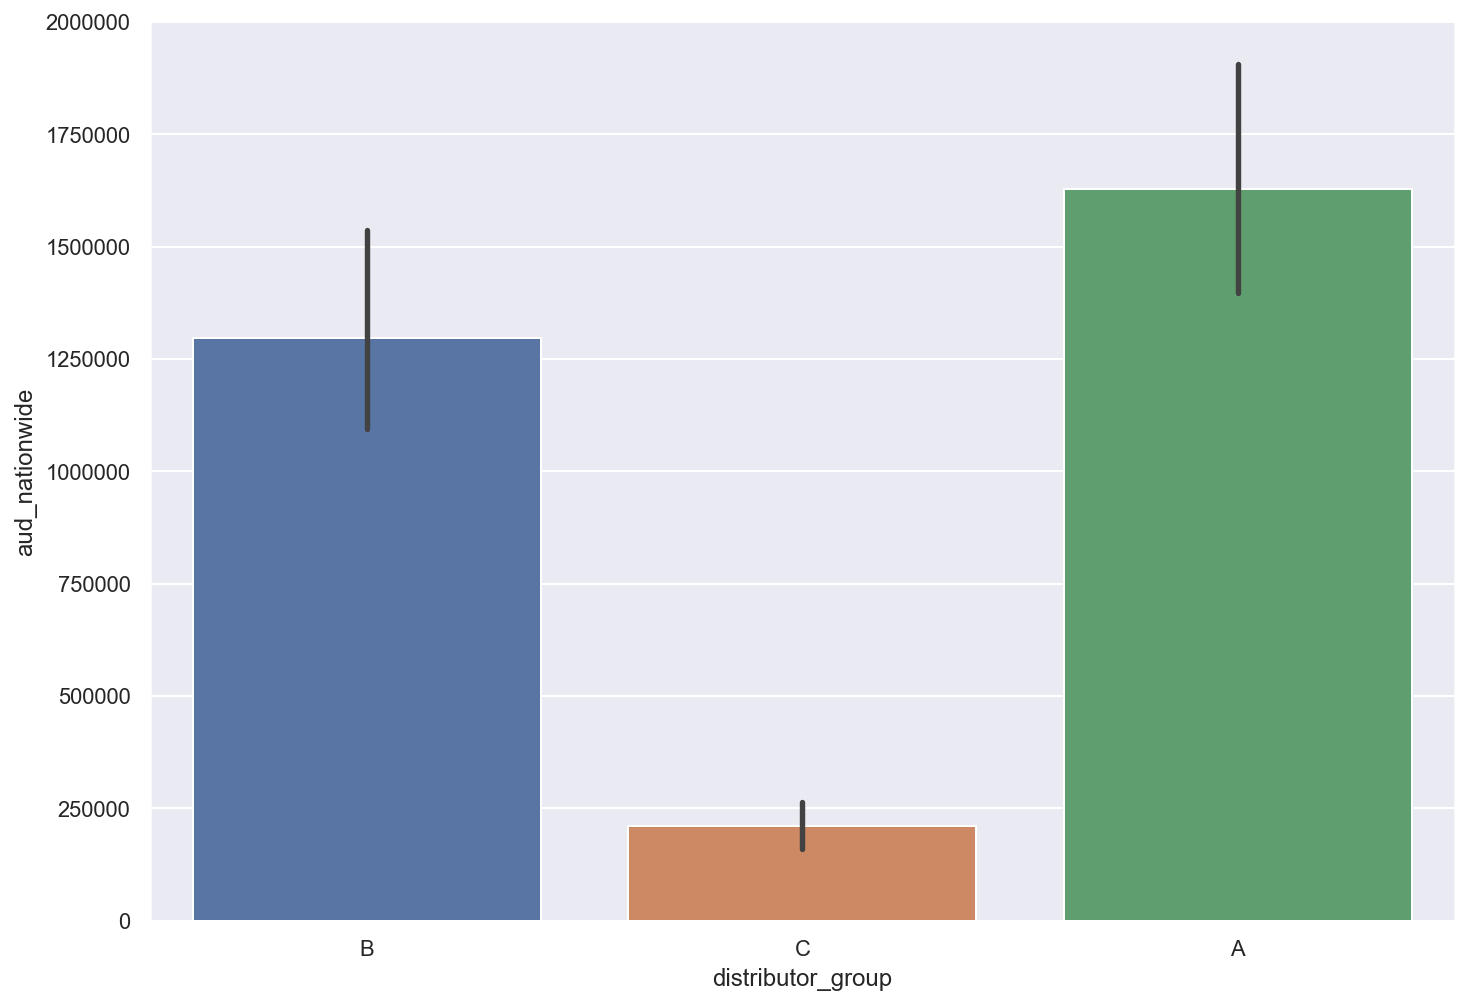

In [319]:
sns.barplot(x=df_data_09['distributor_group'], y=df_data_09['aud_nationwide'])

In [320]:
domestic_major = df_data_09[df_data_09['distributor_group'] == 'A']
hollywood = df_data_09[df_data_09['distributor_group'] == 'B']
domestic_minor = df_data_09[df_data_09['distributor_group'] == 'C']
#domestic_miminor = df_data_09[df_data_09['distributor_group'] == 'D']

In [321]:
len(domestic_major), len(hollywood), len(domestic_minor)

(329, 328, 268)

In [325]:
avg_aud_bydistributorA = sum(
    domestic_major['aud_nationwide']) / len(domestic_major['distributor_group'])
avg_aud_bydistributorB = sum(
    hollywood['aud_nationwide']) / len(hollywood['distributor_group'])
avg_aud_bydistributorC = sum(
    domestic_minor['aud_nationwide']) / len(domestic_minor['distributor_group'])
#avg_aud_bydistributorD = sum(
#    domestic_miminor['aud_nationwide']) / len(domestic_miminor['distributor_group'])

print(" A그룹(domestic_major) 평균 관객수 :  ", round(avg_aud_bydistributorA),"\n",
      "B그룹 평균 관객수(hollywood)      :  ", round(avg_aud_bydistributorB), "\n",
      "C그룹 평균 관객수(domestic_minor) :   ", round(avg_aud_bydistributorC), "\n",
      #"D그룹 평균 관객수(domestic_miminor) : ", round(avg_aud_bydistributorD)
     )

 A그룹(domestic_major) 평균 관객수 :   1628597 
 B그룹 평균 관객수(hollywood)      :   1295823 
 C그룹 평균 관객수(domestic_minor) :    209428 



- 배급사 등급별 평균 전국관객수: A(domestic_major) > B(hollywood) > C(domestic_minor)


#### column2 : sequel, original 

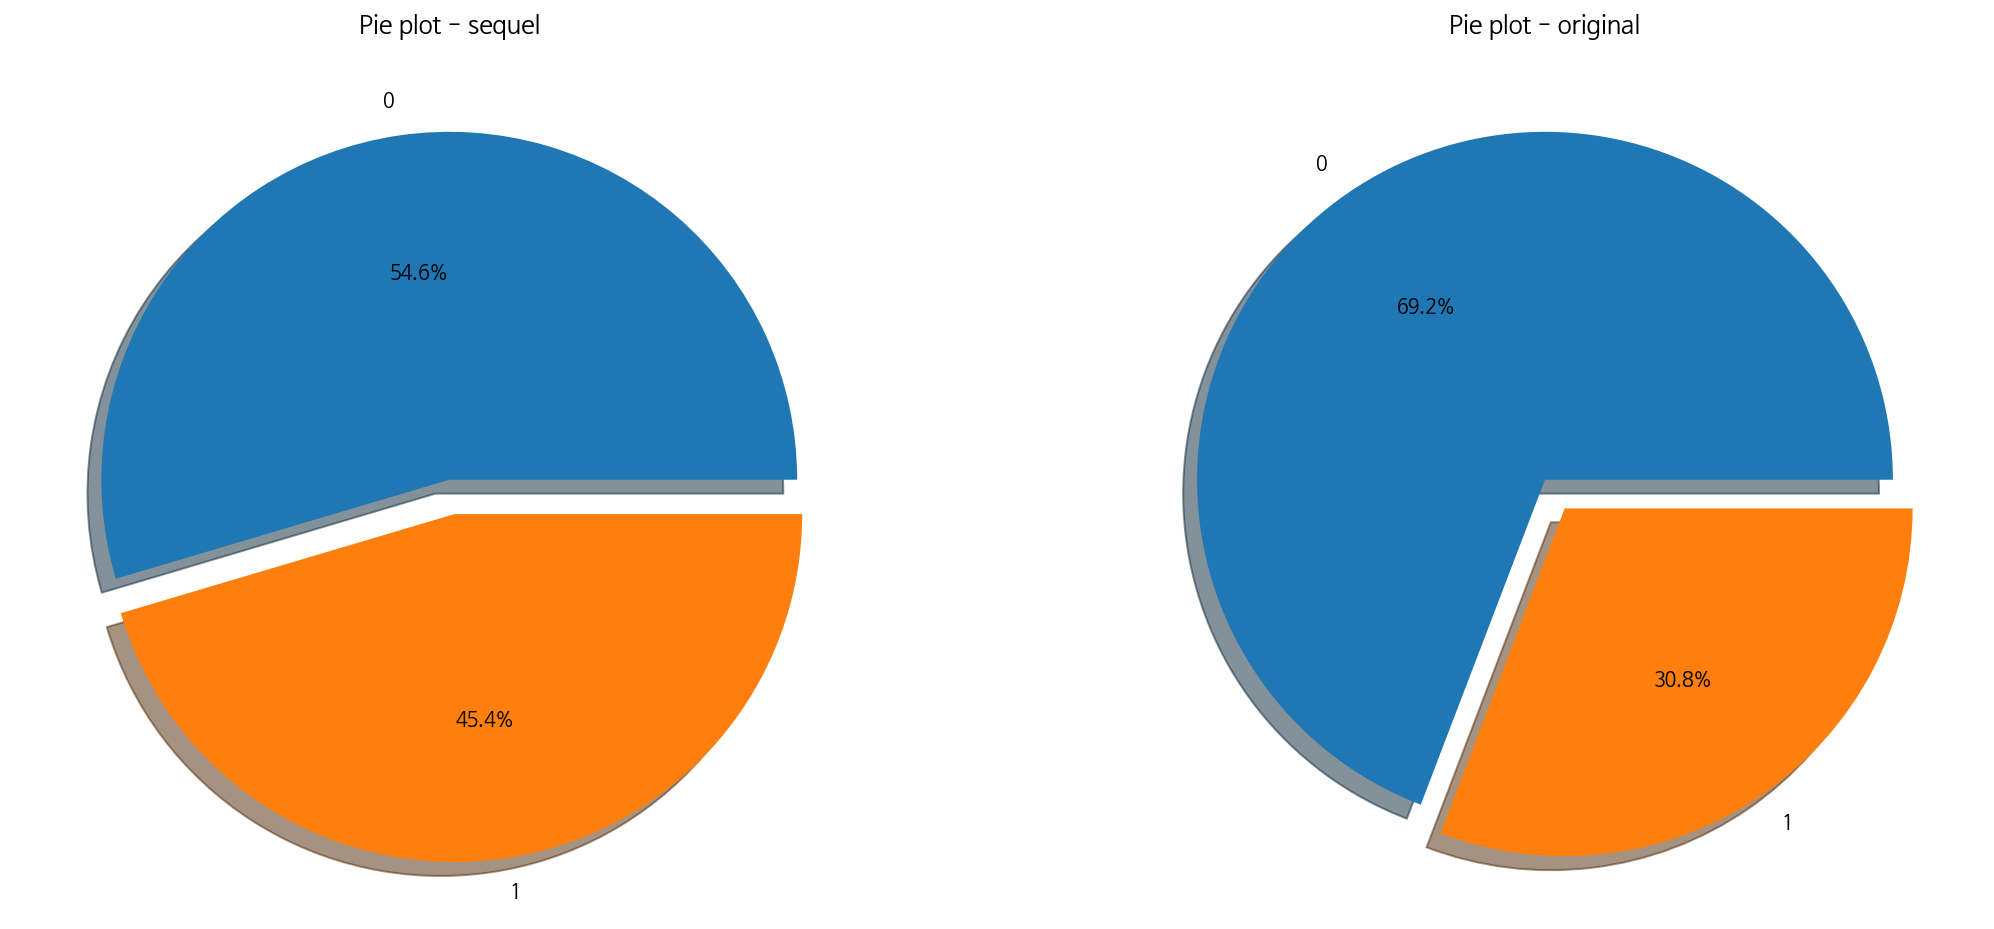

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_data_09['sequel'].value_counts().plot.pie(explode=[0, 0.1],
                                                  autopct='%1.1f%%', ax=ax[0], shadow=True)
df_data_09['original'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Pie plot - sequel')
ax[0].set_ylabel('')
ax[1].set_title('Pie plot - original')
ax[1].set_ylabel('')

plt.show()

- 100위 안에서는 sequel 보다는 original이 차이가 더 크기 때문에 예측에 도움이 될 것이라 예상 

#### column3 : nation

In [63]:
from matplotlib import rc
import matplotlib as mpl

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)
#sns.set(rc={'figure.figsize':(11.7, 8.27)})

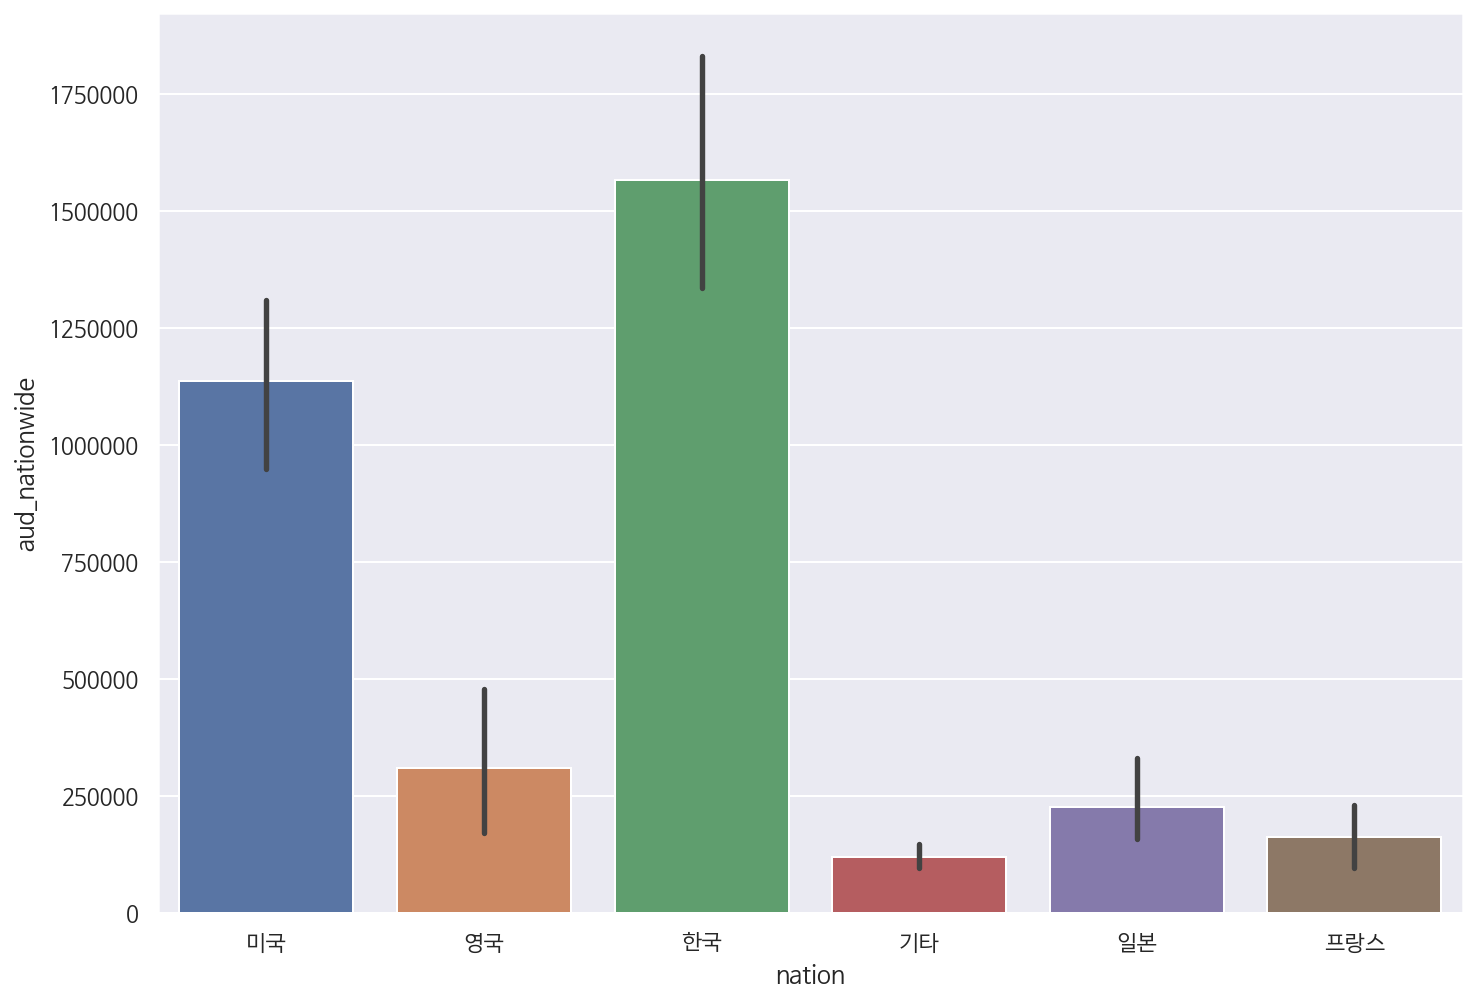

In [64]:
sns.barplot(x=df_final_09["nation"], y=df_final_09["aud_nationwide"])

#### column4 : genre

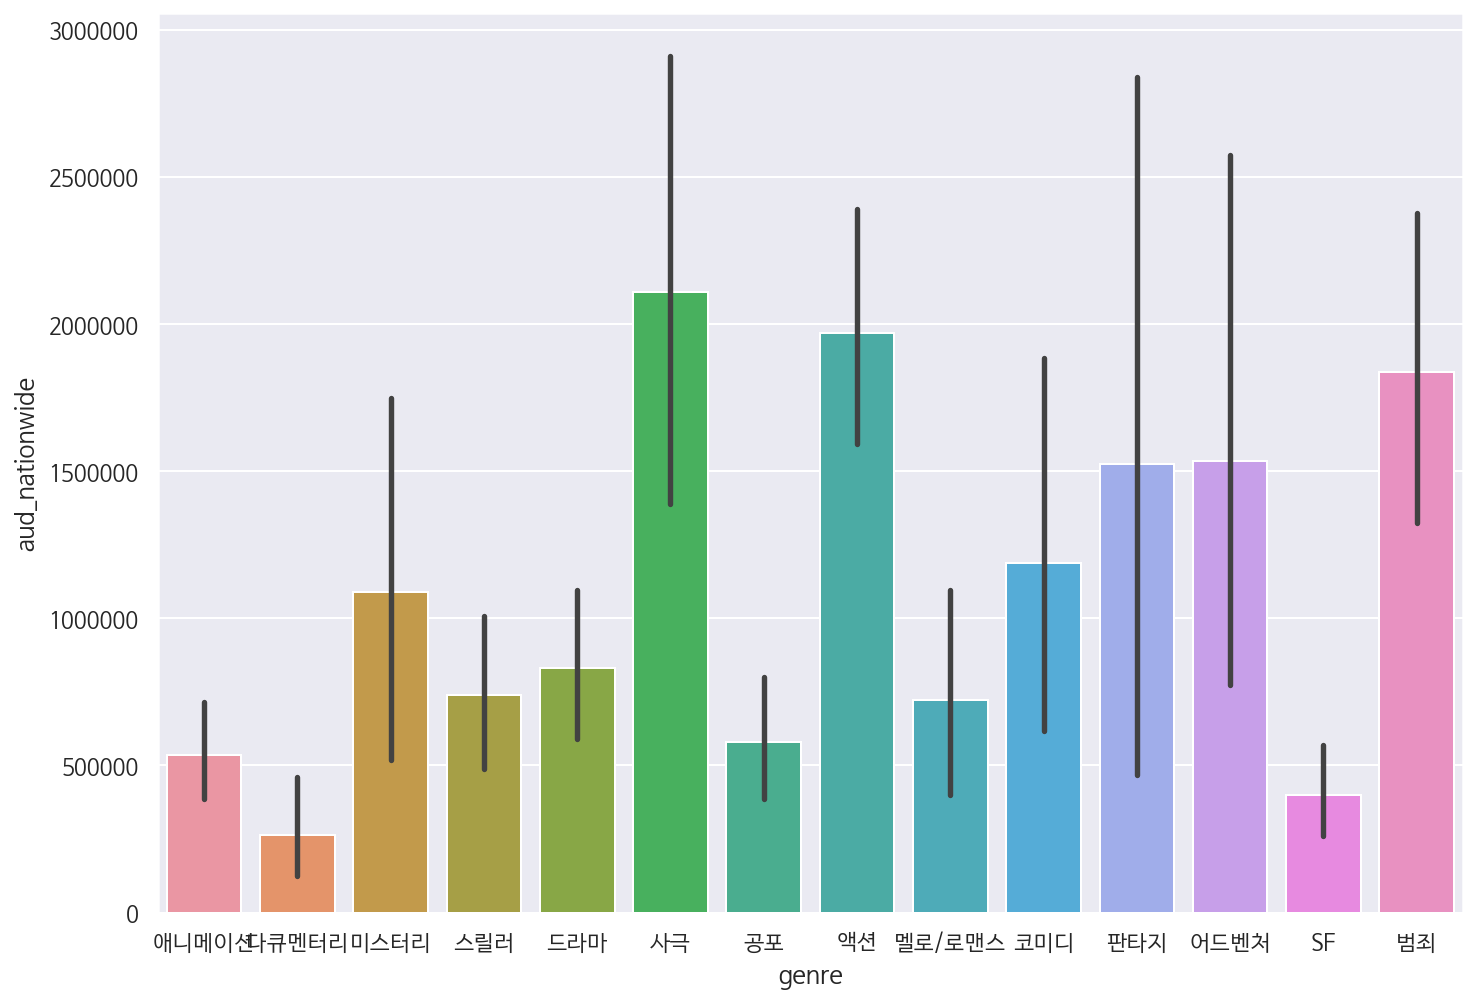

In [65]:
sns.barplot(x=df_final_09["genre"], y=df_final_09["aud_nationwide"])

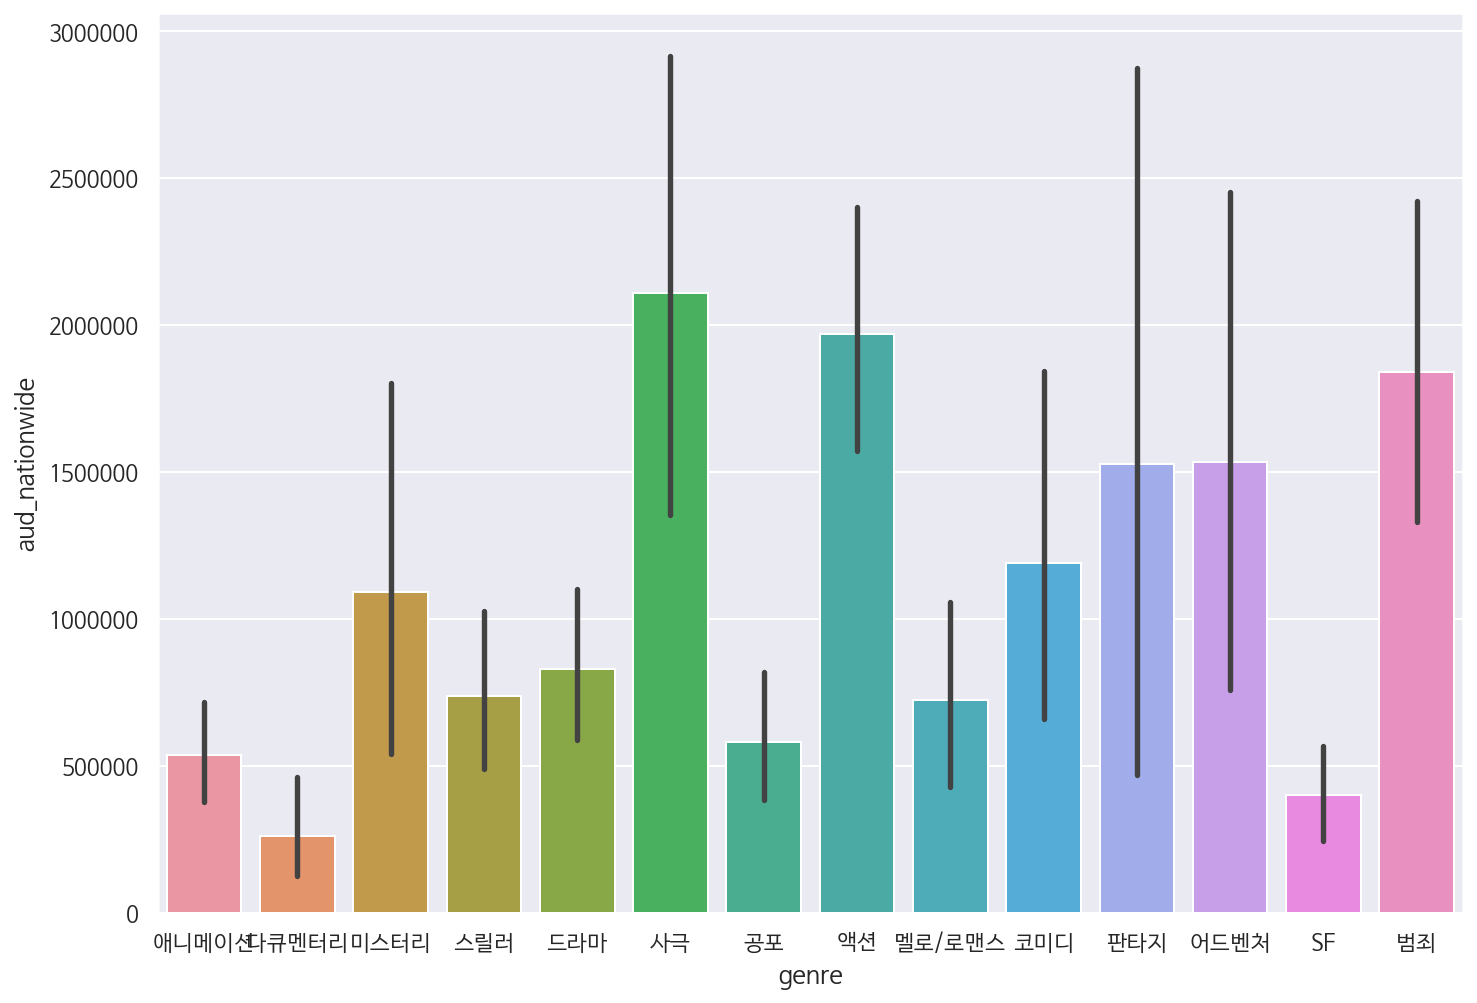

In [120]:
sns.barplot(x=df_data_09['genre'], y=df_data_09['aud_nationwide'])

In [367]:
from matplotlib import rc
import matplotlib as mpl

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)
#sns.set(rc={'figure.figsize':(11.7, 8.27)})

Text(0.5, 1.0, '범죄')

<Figure size 2880x576 with 0 Axes>

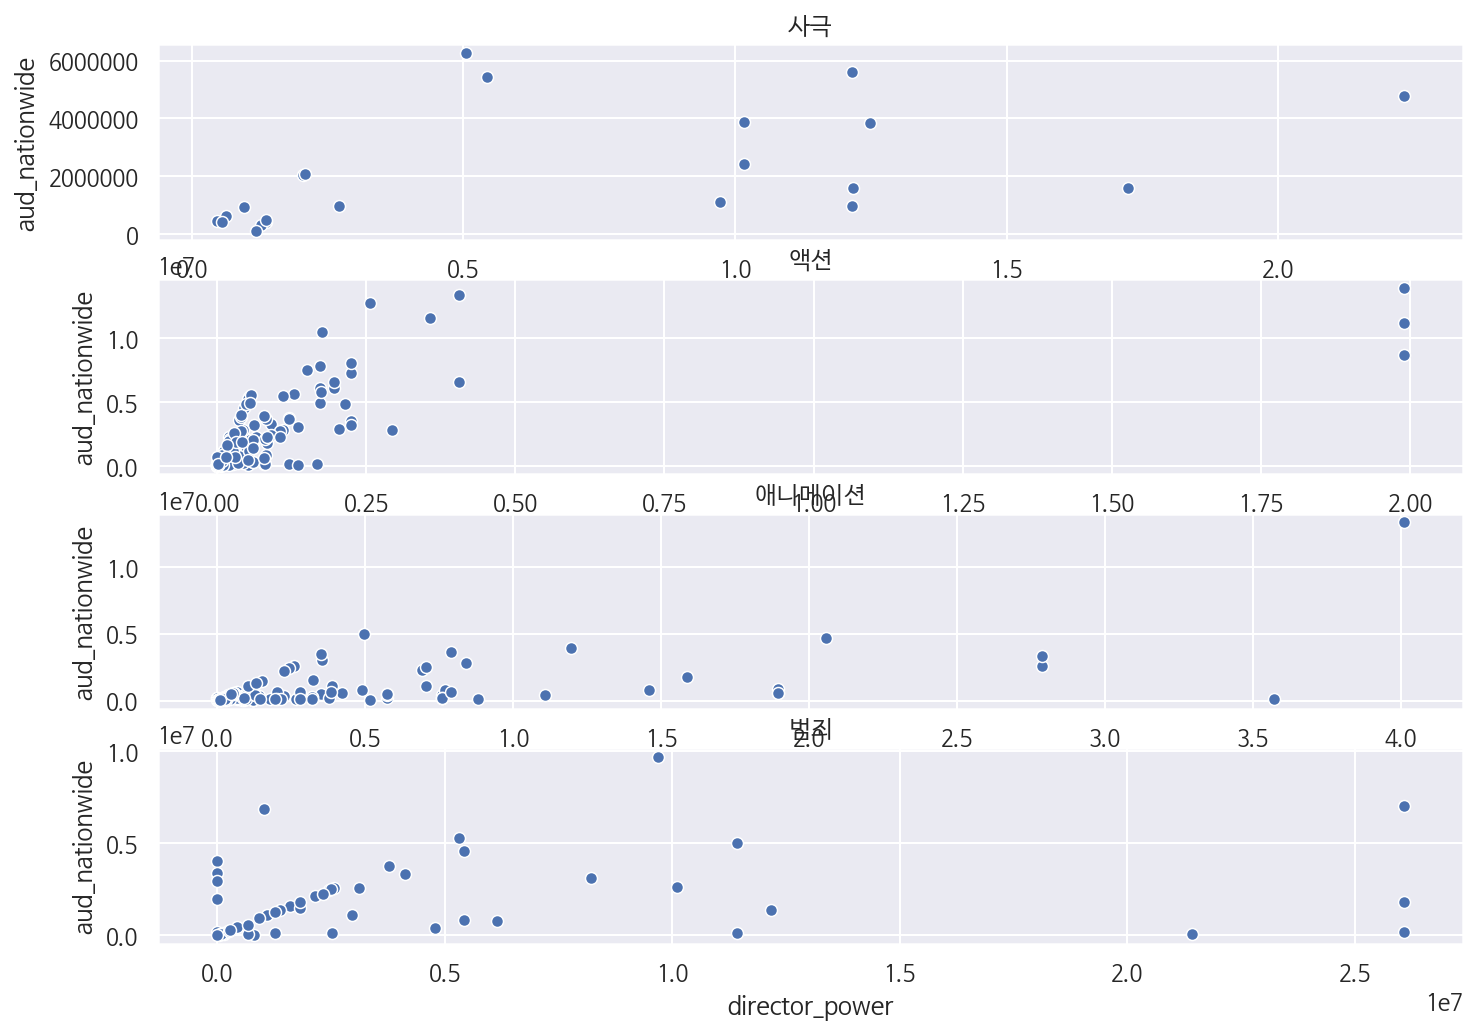

In [17]:
plt.figure(figsize =  (40, 8))
fig, ax = plt.subplots(squeeze=True, nrows= 4, ncols=1)

sns.scatterplot(x=df_data_09[df_data_09['genre'] == "사극"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[0]).set_title("사극")
sns.scatterplot(x=df_data_09[df_data_09['genre'] == "액션"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[1]).set_title("액션")
sns.scatterplot(x=df_data_09[df_data_09['genre'] == "애니메이션"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[2]).set_title("애니메이션")
sns.scatterplot(x=df_data_09[df_data_09['genre'] == "범죄"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[3]).set_title("범죄")
#sns.scatterplot(x=df_data_09[df_data_09['genre'] == "코미디"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[2][1]).set("코미디")
#sns.scatterplot(x=df_data_09[df_data_09['genre'] == "멜로/로맨스"]["director_power"], y=df_data_09['aud_nationwide'], ax=ax[2][1]).set("멜로/로맨스")

In [163]:
#grid = sns.FacetGrid(data=df_data_09, col='genre')
#grid.map(sns.stripplot, 'director_power', 'aud_nationwide')

In [339]:
#sns.scatterplot(x=df_data_09[df_data_09['genre'] == "사극"]["director_power"], y=df_data_09['aud_nationwide'])

In [340]:
#sns.scatterplot(x=df_data_09[df_data_09['genre'] == "액션"]["director_power"], y=df_data_09['aud_nationwide'])

In [341]:
#sns.scatterplot(x=df_data_09[df_data_09['genre'] == "애니메이션"]["director_power"], y=df_data_09['aud_nationwide'])

#### column 5 : rate

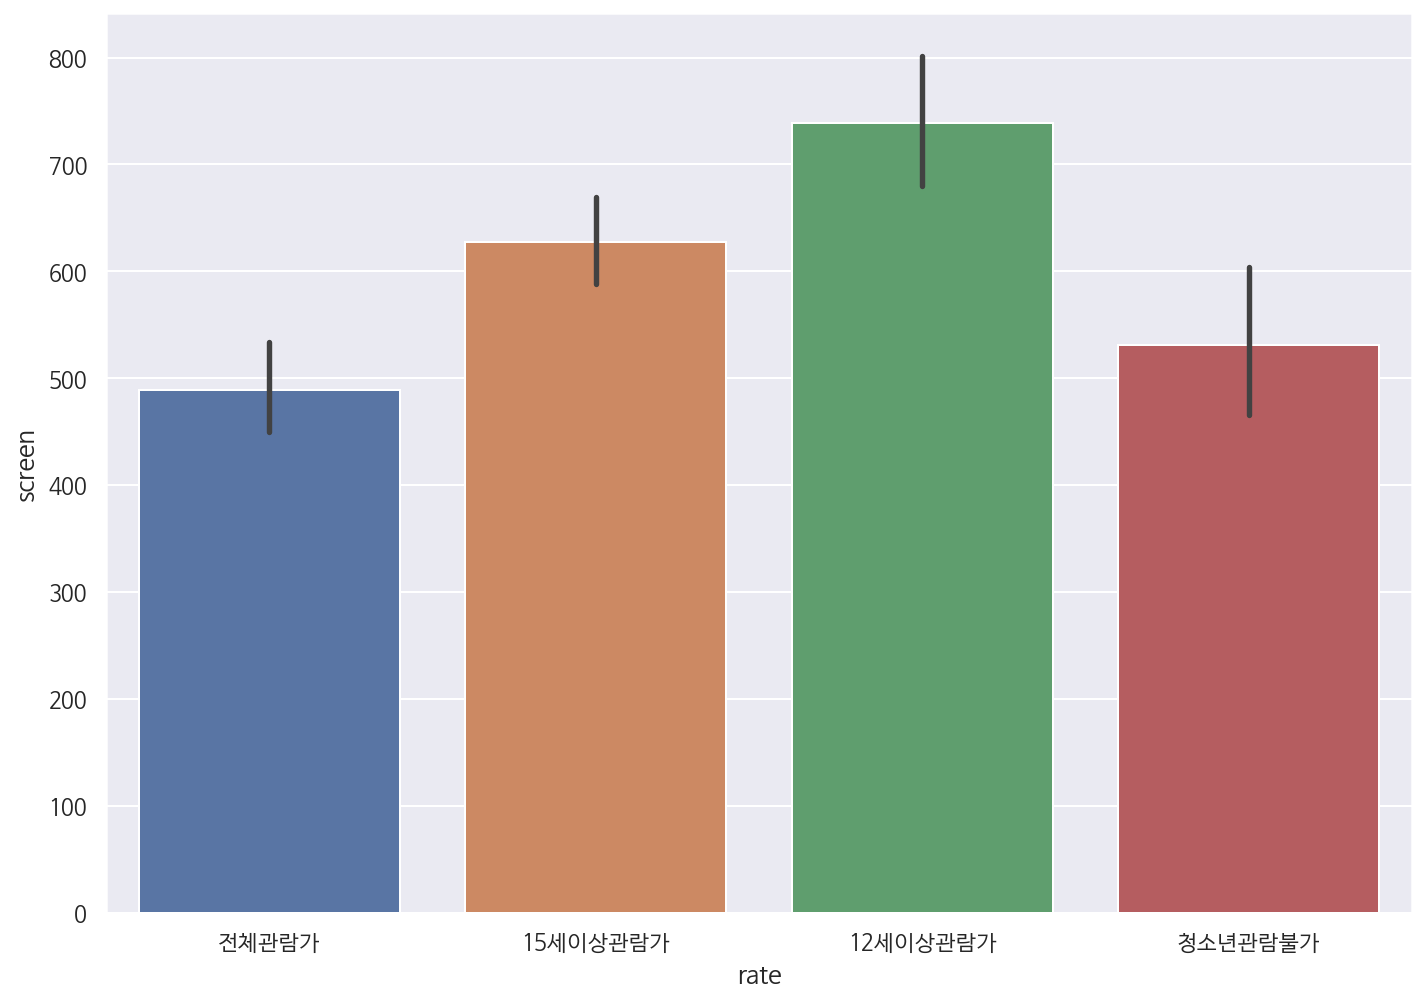

In [122]:
sns.barplot(x=df_data_09['rate'], y=df_data_09['screen'])

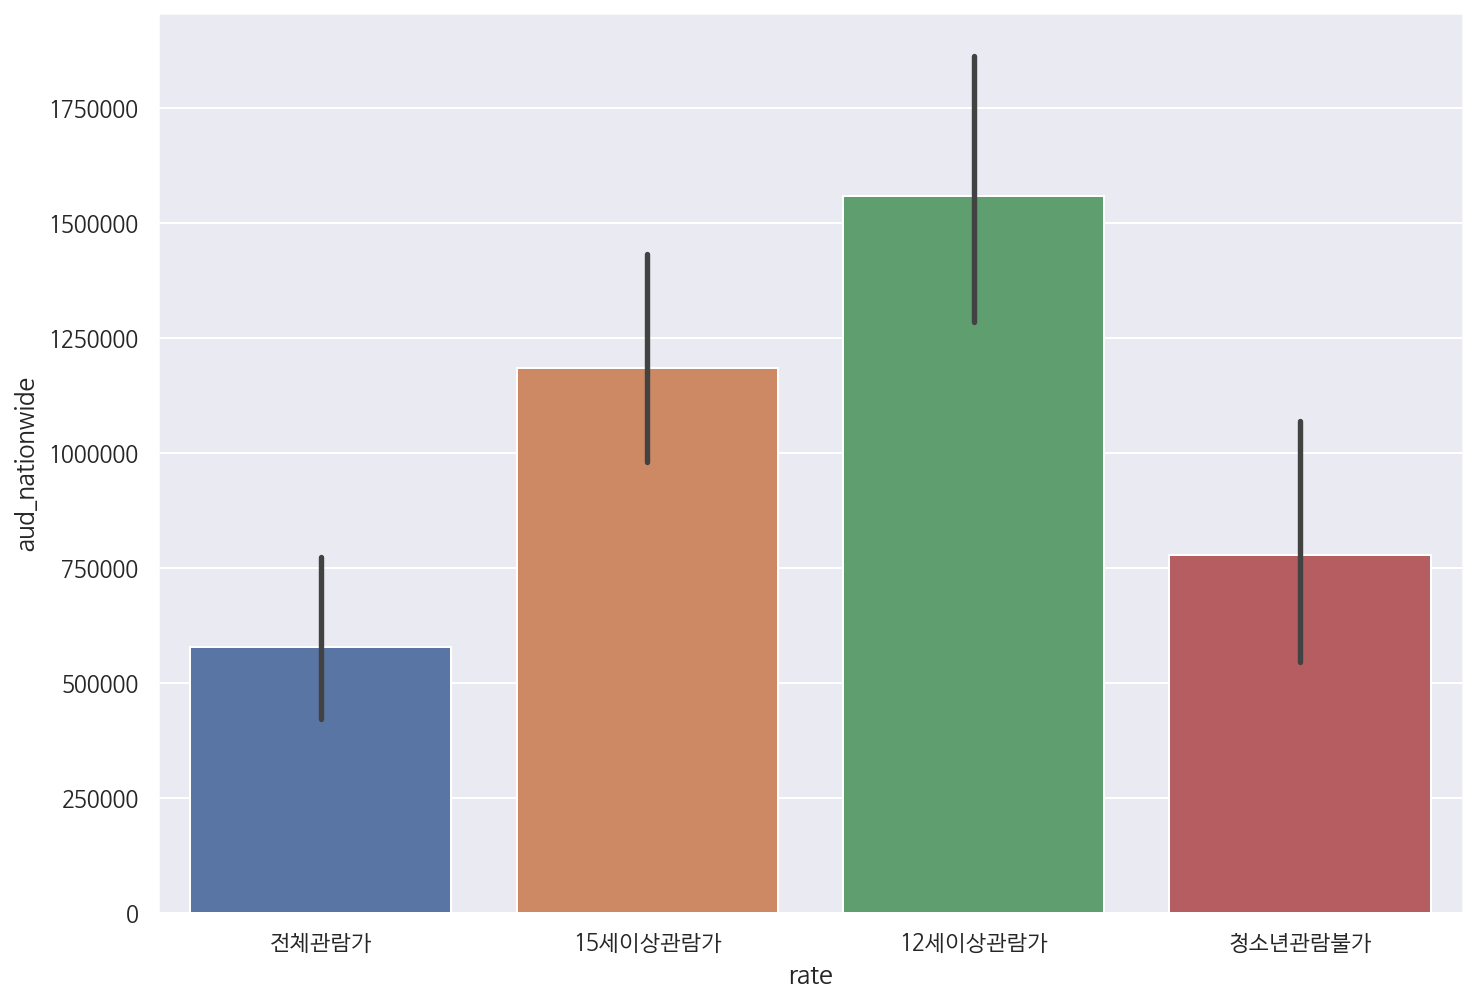

In [68]:
sns.barplot(x=df_data_09['rate'], y=df_data_09['aud_nationwide'])

In [69]:
rate_all = df_data_09[df_data_09['rate'] == '전체관람가']
rate_12 = df_data_09[df_data_09['rate'] == '12세이상관람가']
rate_15 = df_data_09[df_data_09['rate'] == '15세이상관람가']
rate_adult = df_data_09[df_data_09['rate'] == '청소년관람불가']

In [94]:
len(rate_all['rate']), len(rate_12['rate']), len(rate_15['rate']), len(rate_adult['rate'])

(223, 262, 338, 102)

In [98]:
sum(rate_all['aud_nationwide']), sum(rate_12['aud_nationwide']), sum(rate_15['aud_nationwide']), sum(rate_adult['aud_nationwide'])

(128935812, 408180836, 400404516, 79444024)

In [102]:
avg_audnat_rateAll = sum(rate_all['aud_nationwide']) / len(rate_all['rate'])
avg_audnat_rate12 = sum(rate_12['aud_nationwide']) / len(rate_12['rate'])
avg_audnat_rate15 = sum(rate_15['aud_nationwide']) / len(rate_15['rate'])
avg_audnat_rateadult = sum(rate_adult['aud_nationwide']) / len(domestic_miminor['rate'])

print(" 전체관람가 평균 관객수 :        ", round(avg_audnat_rateAll),"\n",
      "12세이상 관람가 평균 관객수 :  ", round(avg_audnat_rate12), "\n",
      "15세이상 평균 관객수 :         ", round(avg_audnat_rate15), "\n",
      "청소년관람불가 평균 관객수 :    ", round(avg_audnat_rateadult))

 전체관람가 평균 관객수 :         578187 
 12세이상 관람가 평균 관객수 :   1557942 
 15세이상 평균 관객수 :          1184629 
 청소년관람불가 평균 관객수 :     306734


In [221]:
df_rate_avg = pd.DataFrame({"rate" : ["전체관람가", "12세이상관람가", "15세이상관람가", "청소년관람불가"],
             "avg_aud_nationwide" : [578187, 1557942, 1184629, 306734]})
df_rate_avg

rate  avg_aud_nationwide
0     전체관람가              578187
1  12세이상관람가             1557942
2  15세이상관람가             1184629
3   청소년관람불가              306734

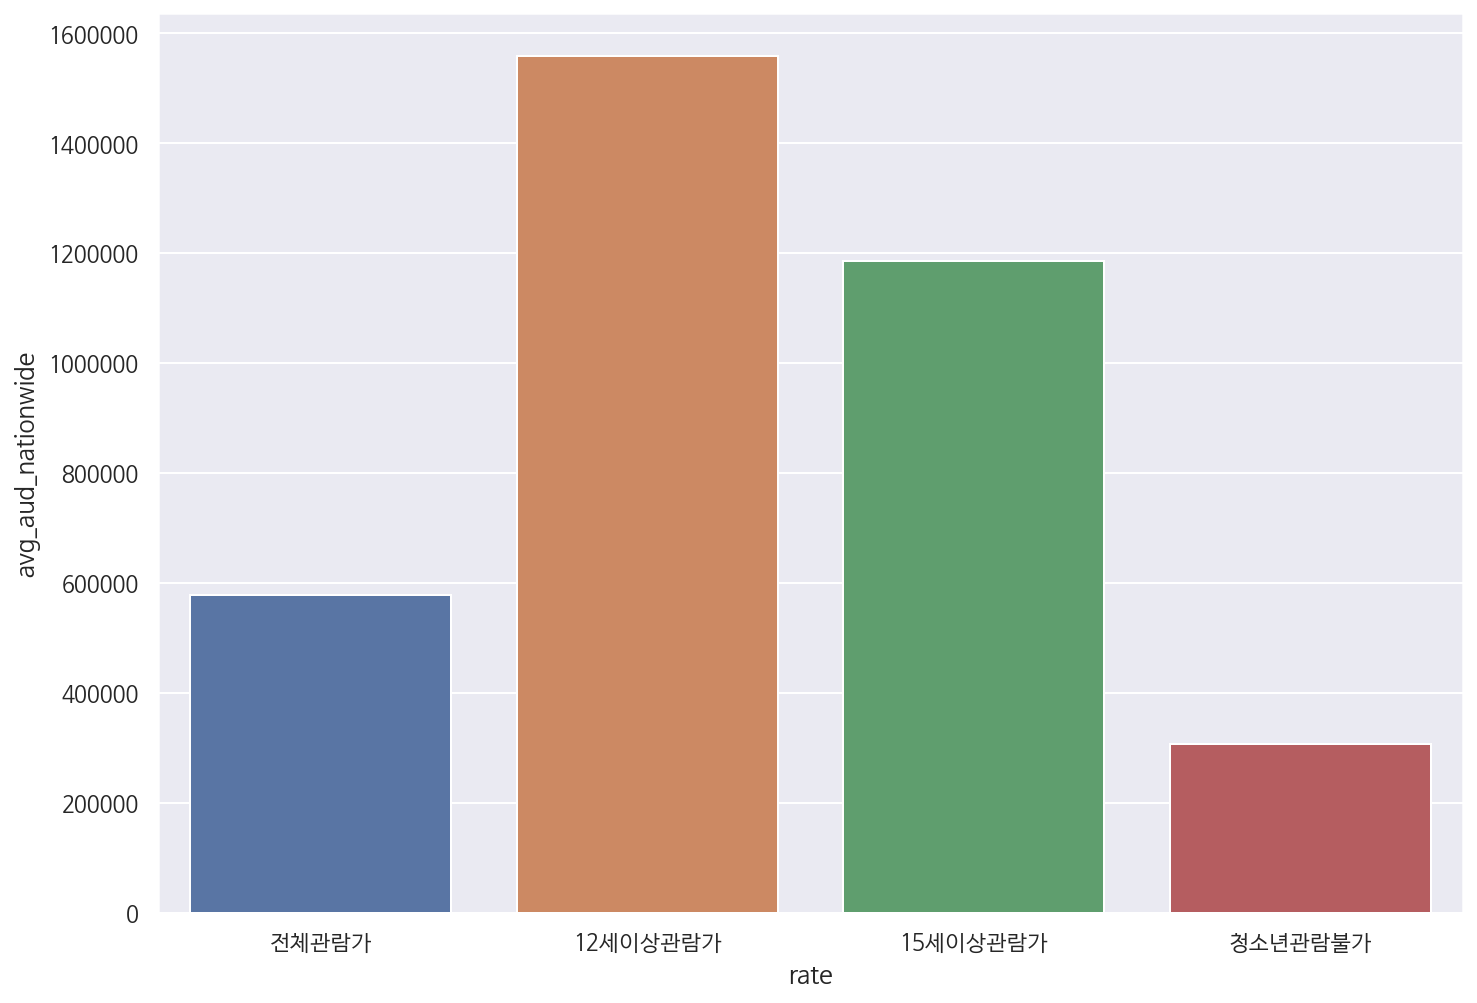

In [184]:
sns.barplot(x=df_rate_avg["rate"], y=df_rate_avg["avg_aud_nationwide"])

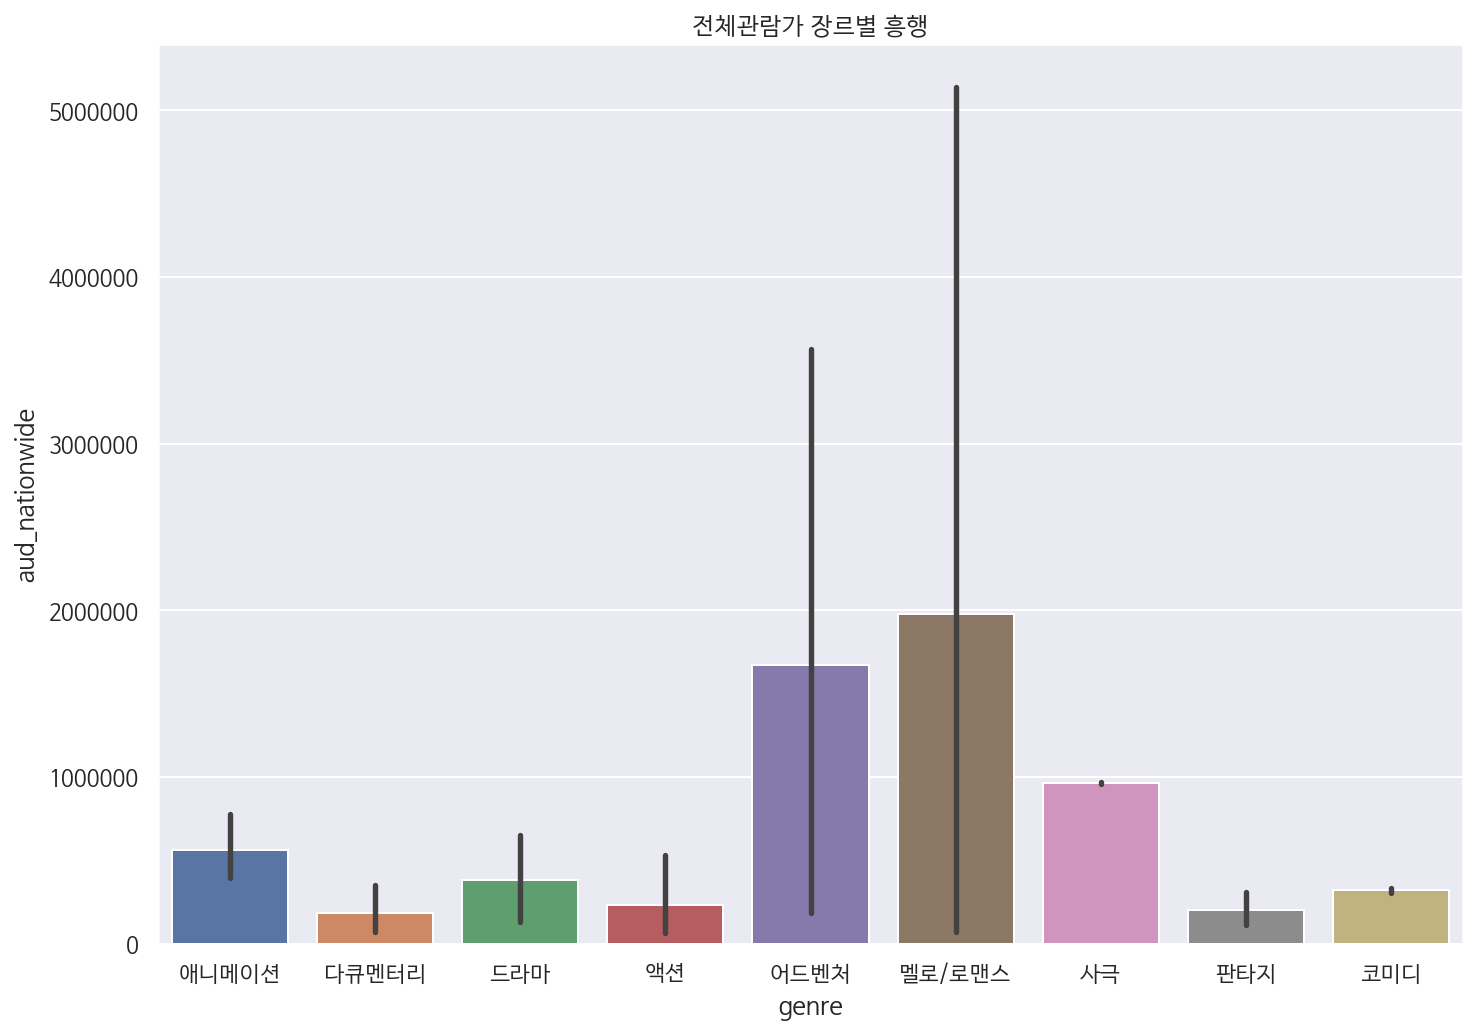

In [113]:
sns.barplot(x=rate_all["genre"], y=rate_all["aud_nationwide"]).set_title("전체관람가 장르별 흥행")
plt.show()

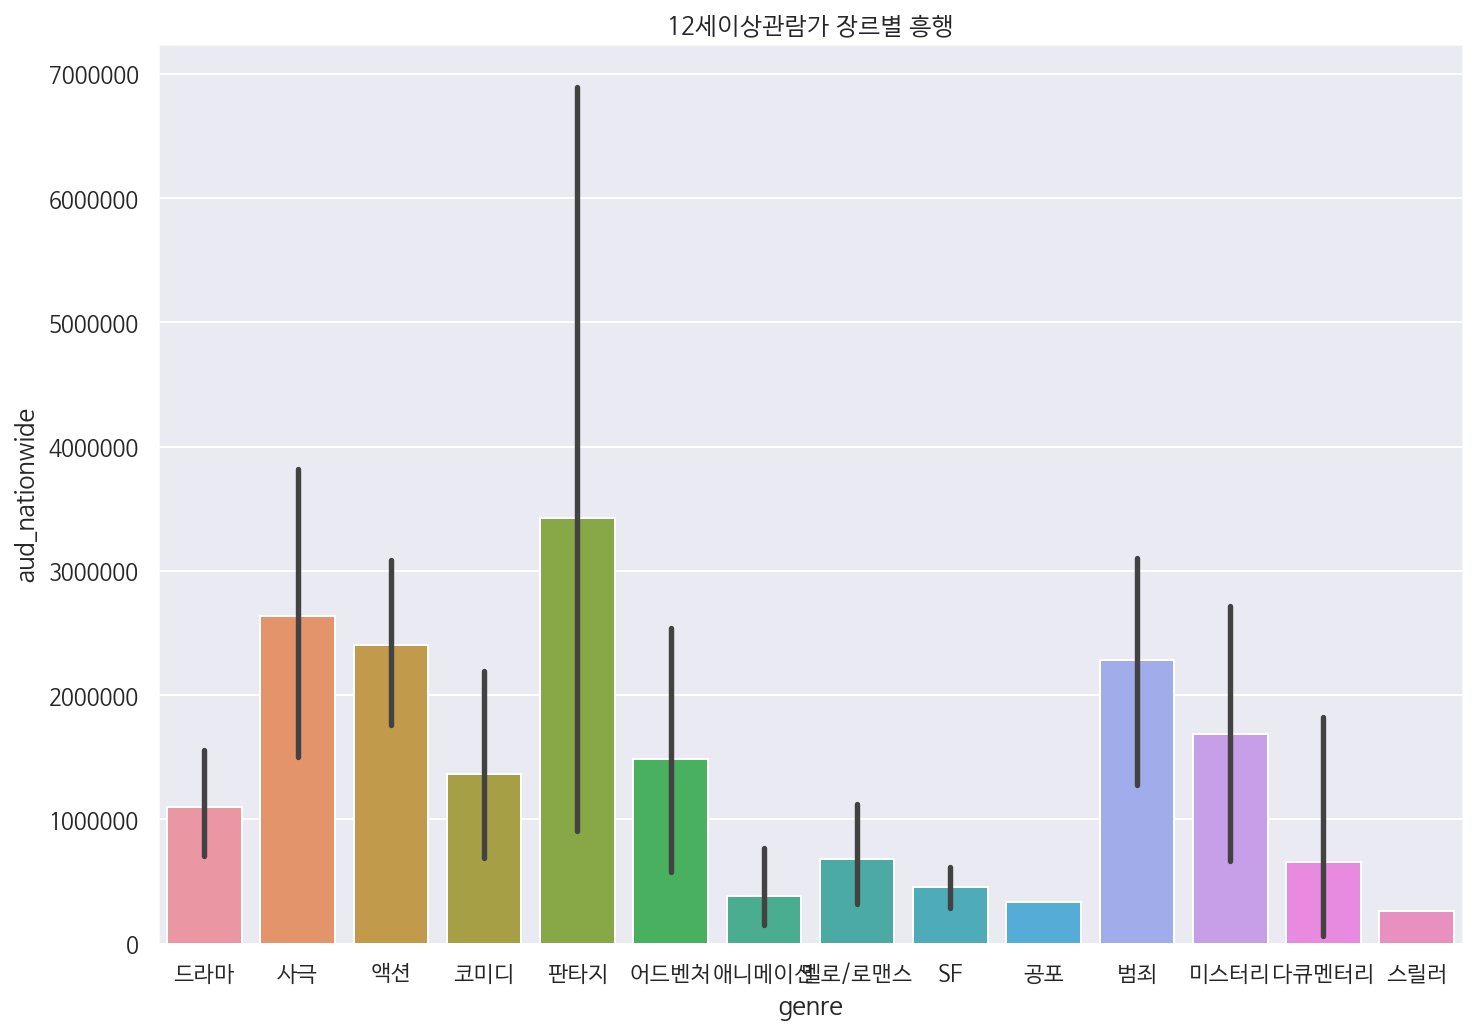

In [114]:
sns.barplot(x=rate_12["genre"], y=rate_12["aud_nationwide"]).set_title("12세이상관람가 장르별 흥행")
plt.show()

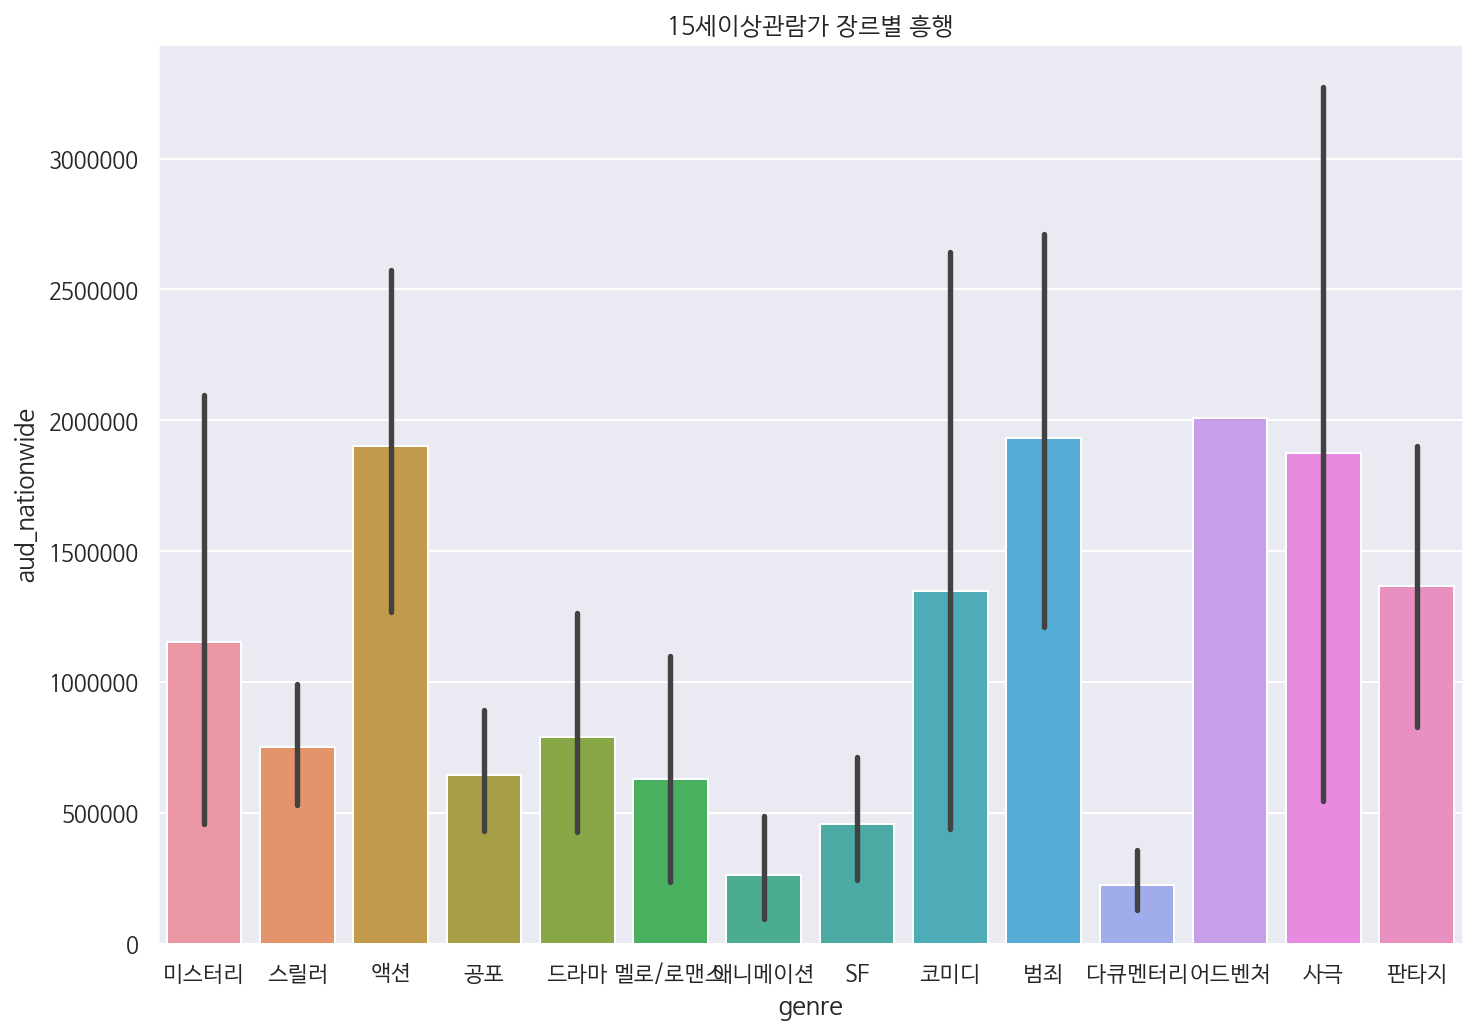

In [116]:
sns.barplot(x=rate_15["genre"], y=rate_15["aud_nationwide"]).set_title("15세이상관람가 장르별 흥행")
plt.show()

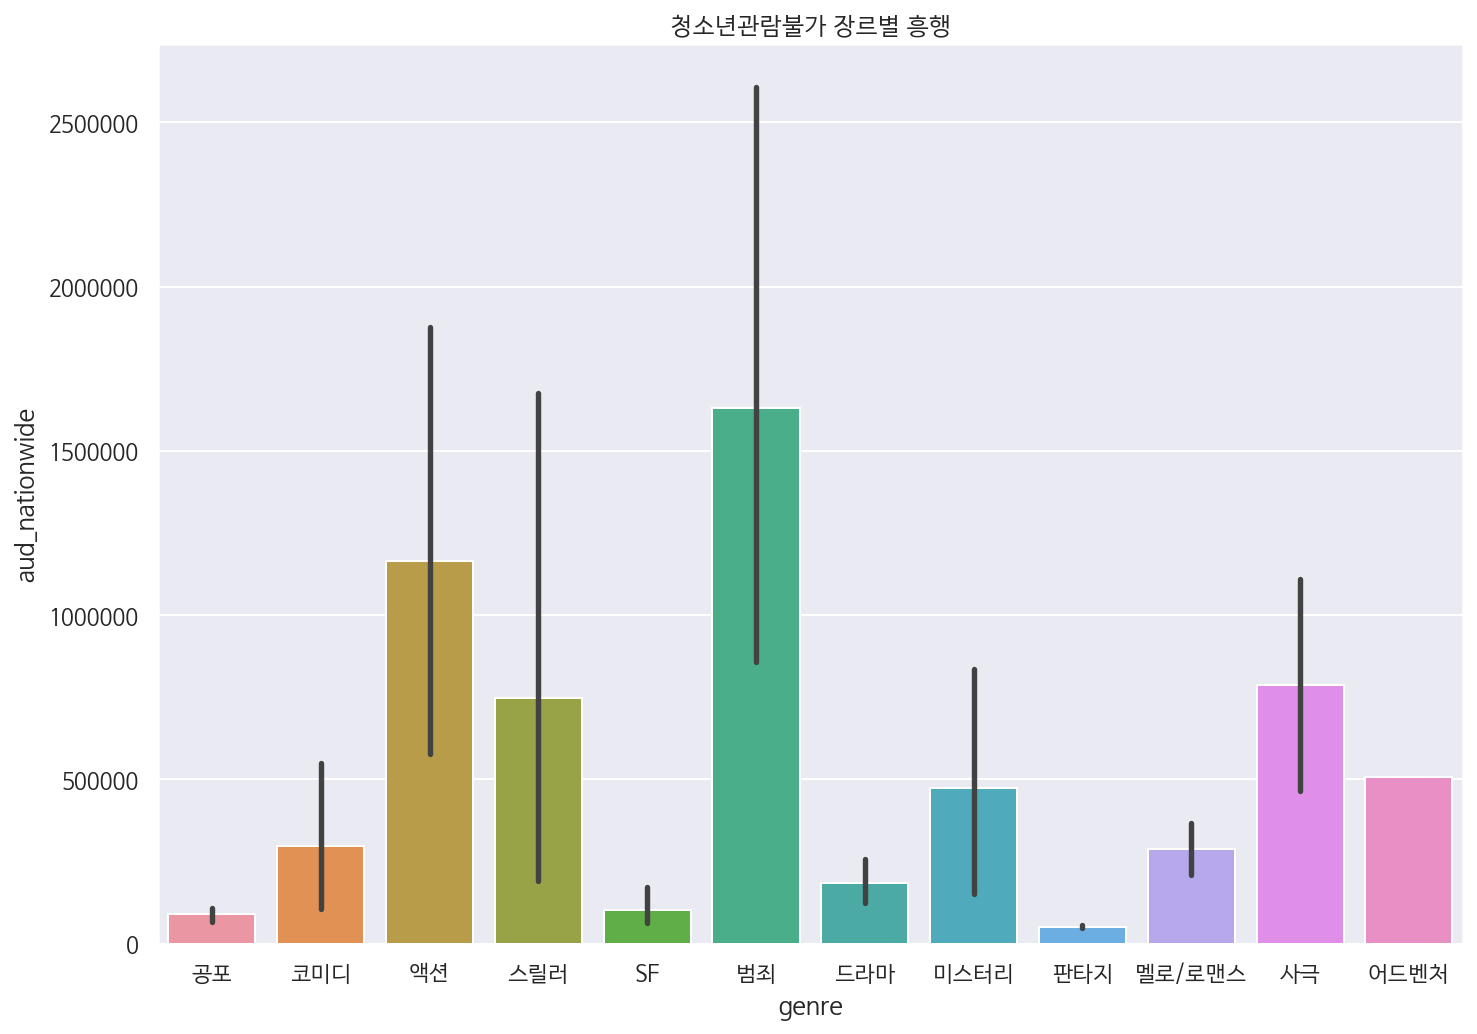

In [117]:
sns.barplot(x=rate_adult["genre"], y=rate_adult["aud_nationwide"]).set_title("청소년관람불가 장르별 흥행")
plt.show()

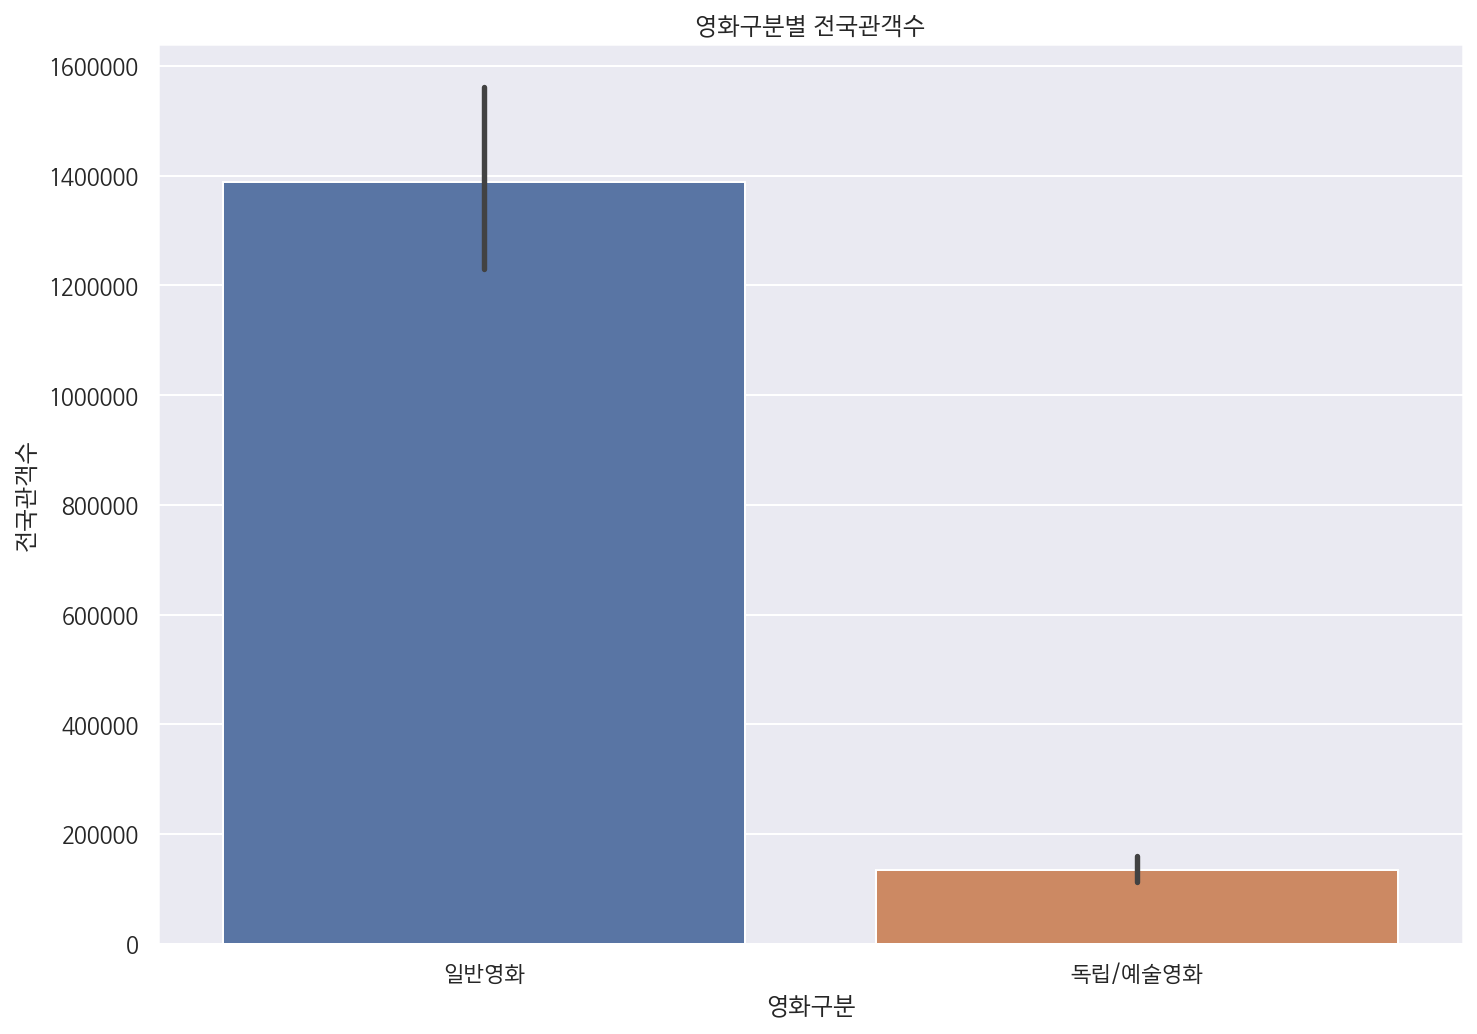

In [196]:
sns.barplot(x=df_final_03["영화구분"], y=df_final_03["전국관객수"]).set_title("영화구분별 전국관객수")
plt.show()

In [217]:
#len(df_final_03[df_final_03['영화구분'] == '독립/예술영화'])
#len(df_final_03[df_final_03["영화구분"] == '일반영화'])

In [218]:
#sum(df_final_03[df_final_03['영화구분'] == '독립/예술영화']['전국관객수'])
#sum(df_final_03[df_final_03['영화구분'] == '일반영화']['전국관객수'])

In [215]:
avg_audnationwide_indi = sum(df_final_03[df_final_03['영화구분'] == '독립/예술영화']['전국관객수']) / len(df_final_03[df_final_03['영화구분'] == '독립/예술영화'])
avg_audnationwide_normal = sum(df_final_03[df_final_03['영화구분'] == '일반영화']['전국관객수']) / len(df_final_03[df_final_03['영화구분'] == '일반영화'])
print(" avg_audnationwide_normal : ", round(avg_audnationwide_normal), "\n", "avg_audnationwide_indi :    ",  round(avg_audnationwide_indi), "\n")

 avg_audnationwide_normal :  1388328 
 avg_audnationwide_indi :     134029 



In [220]:
df_type_avg = pd.DataFrame({"type" : ["일반영화", "독립/예술영화"],
             "avg_aud_nationwide" : [1388328 , 134029]})
df_type_avg

type  avg_aud_nationwide
0     일반영화             1388328
1  독립/예술영화              134029

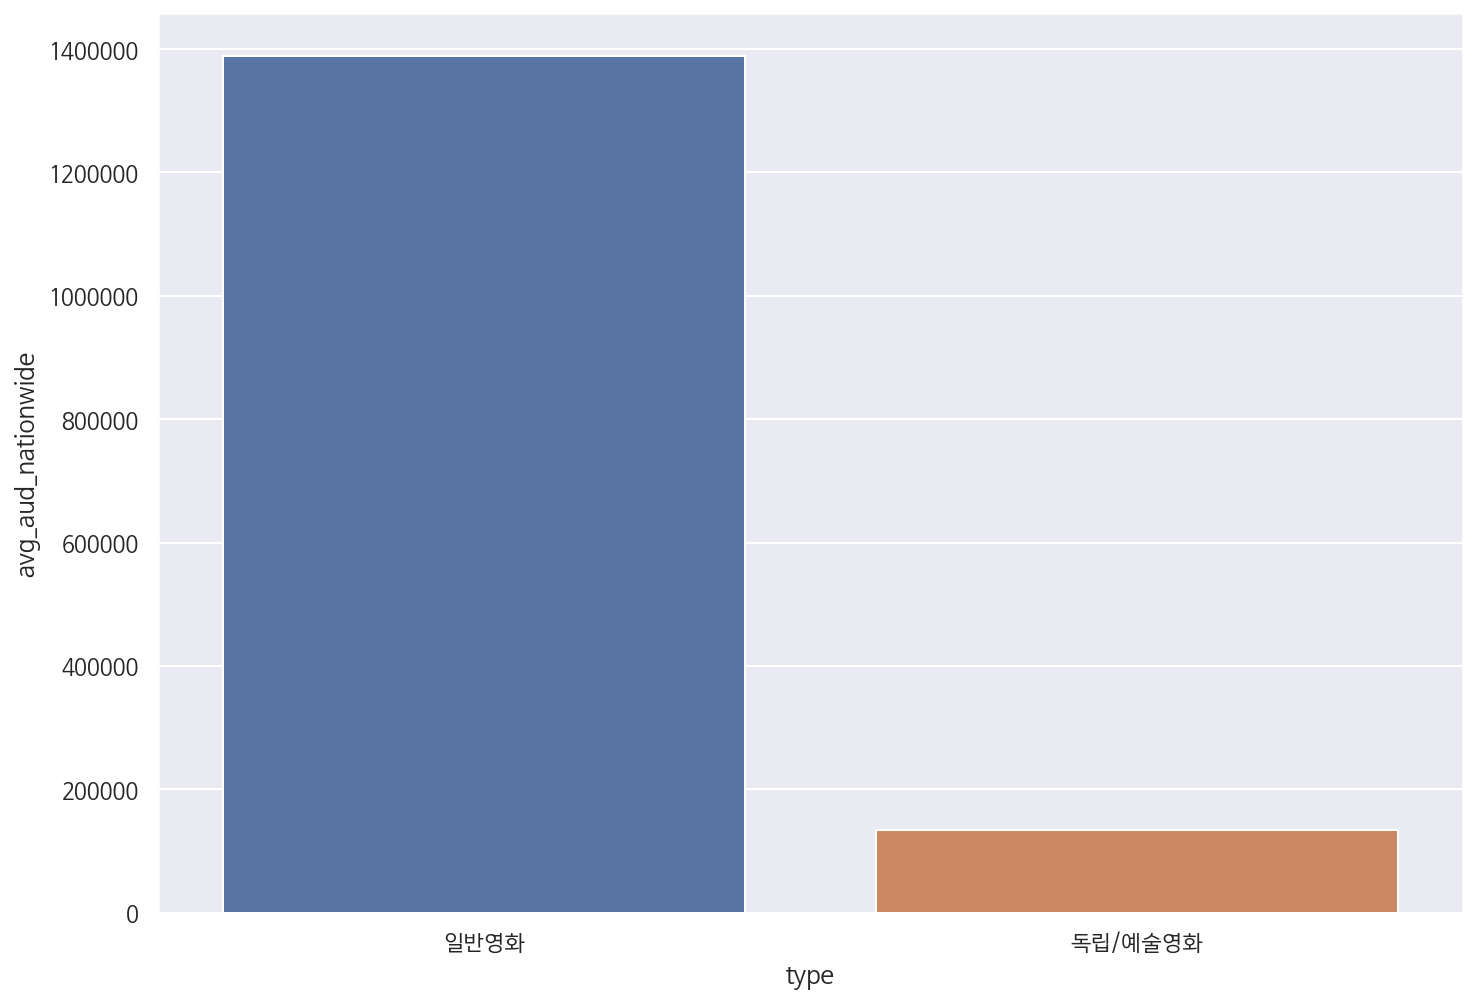

In [222]:
sns.barplot(x=df_type_avg["type"], y=df_type_avg["avg_aud_nationwide"])

#### 참고문헌

- 뉴스 기사
    - 영화흥행 순위(매출 VS. 관객수)(https://news.mt.co.kr/mtview.php?no=2019112914134099089)
- 논문
    - 김은미,〈한국 영화의 흥행 결정 요인에 관한 연구〉, 2003
        - `스타파워 산출시 배우 수 참고(남주, 여주,남조주, 여조주)`
        - 마케팅과 홍보 영역 : 마케팅 비용 자료 얻을 수 없어 `홍보기사 개수` 포함
        - 한국 제작 영화 VS. 헐리우드 영화 흥행 요소 분석
    - 박승현, 정완규 〈한국 영화시장의 흥행결정 요인에 관한 연구: 2006-2008년 개봉작품을 중심으로〉, 2009
        - `매년 흥행 순위 100위`(기준: 한국영화연감, 영진위 자료 바탕, 전국 관객 수 기준)
        - `배급사 파워 구분` : 
            - 헐리우드 배급사 자회사 설치/직배사
            - 한국메이저 배급사(CJ ENM, 쇼박스, 롯데엔터테인먼트)
            - 국내 미니 메이저 배급사(300편 중 20편 이상 배급)
            - 국내 독립 배급사(10편 이상의 배급 편수)
        - 개봉시점 : 여름방학 7-8월, 겨울방학 12-2월 시즌
    - 김유진, 권오경,〈영화 투자자를 위한 흥행성과 예측지표 발굴〉, 2017
        - `상호작용 변수 적용 : 계절 * 장르`
        - `원작여부, 실화 여부, 시리즈 여부` 구분 참고
        - 2010-2015 개봉영화 중 상업영화 + 매출액 천만 원 이상
    - 문병준, 서혜미, 김혜정, 〈한국 영화시장의 흥행에 관한 통계분석 : 2006 ~ 2010년 흥행 작품을 중심으로〉, 2011
        - 독립 변수들 : 개봉스크린 규모, 메이저 배급사, 스타배우, 관람등급, 상영시간, `비평가&관람객 평가`, 장르, 개봉 첫주 상영관수(`네이버 평점등록 관람객 수`로 대체), 수상경력, 애국심 자극 여부, 국적
        